### Credit Exploratory Data Analysis Case Study - March - 2022  

#### Submitted By: Sourabh S Hubballi  
Dated: 28/03/2022

All Steps and methodologies reffered by Upgrad Module Videos 

### A. Basics things need to do:

### A1. Libraries

In [1]:
# Importing Libraries for analyzing the data:
import pandas as pd                              #Pandas Library
import numpy as np                               #Numpy Library
import matplotlib.pyplot as plt, seaborn as sns  #Graph library[Matplot & Seaborn]
import warnings                                  #Warning Library
warnings.filterwarnings("ignore")                #Ignore all warnings

### A2. Data Sets . 

 - app_dt represents application_Data   
 - pr_app_dt represents previous_application_Data

In [2]:
ap_dt = pd.read_csv("Application_data.csv")           # ap_dt= application_Data
pr_ap_dt= pd.read_csv("previous_application.csv")     # pr_ap_dt= previous_application_Data

### A3. To Check how many null values are present in each of the columns,  defining variable "nulls"    

In [3]:
#creating a function to find null values for the dataframe
def nulls(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)

# 1.  Data set:" Application_data.csv":
---

## 1.0 Data Understanding

### 1.1 What we need to understand before proceeding to further process?
  1. How many Rows and Columns and columns are there?
  2. What are the Datatypes? 
  3. How many columns are having numeric values: Positive numbers, Negative Numbers
  4. Are the data in correct format? (ie,Days, Hours, Months, Years. etc.) 

In [4]:
# Display the content of Application data file
ap_dt.head()                 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 1.2 Number of Rows and Columns.

In [5]:
## Number of rows and columns available 
print(ap_dt.shape)

(307511, 122)


### 1.3 Datatypes

In [6]:
## Datatype of the columns
types= ap_dt.dtypes
types

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:
# Ok, Rows are not visible properly!! lets make a good look for Proper Data Visibility. 
pd.set_option("Display.max_rows",200)            #Visibility of Max No. of Rows
pd.set_option("Display.max_columns",600)         #Visibility of Max No. of Rows
pd.set_option("Display.width",1250)              #Cell Width

In [8]:
## Lets see how the Data looks now!
types= ap_dt.dtypes
types

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


### 1.4 Counts & Graphical Representation for Datatypes

float64    65
int64      41
object     16
dtype: int64


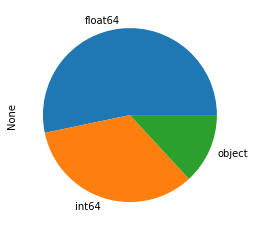

As per Above graph Float Values are more than Integers and Strings


In [9]:
#Total Count of each data types
print(types.value_counts())
types.value_counts().plot.pie() # Graphical Representation for Data Types.
plt.show()

print("As per Above graph Float Values are more than Integers and Strings")

### 1.5 Descriptive view of Data file

In [10]:
# lets check the Variables which are correct format or are there any negative value.
ap_dt.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### 1.6 Summary about data file read & understanding:
   * There are: 3,07,511 Rows &  122 Colums.
      * 3 types of datatypes available: 
                 - Integers, 
                 - Float values,
                 - Strings.        
   * There are negative values in some of columns.
   * There are days and hour which are not in format. 

-----

## 2.0 Data Cleaning & Manipilation for Application Data 

* Lets make the data looks good for analysis.:
    How we are going to do that? 
    - Rectify the null values. 
    - Filter unwanted data columns 
    - Fill the missing values
    - Sort the data
    - Fix the datatype.

### 2.1 Rectifying the Null Values

In [11]:
# Number of Null Values found in data set. Store the missing value in variable "mis_val1"
mis_val= nulls(ap_dt)
mis_val

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

As per above percentage results there are lot of columns missing and are above 50%. Lets count the total number of missing values

### 2.2 Null Data above 50%

In [12]:
# As per above percentage results there are lot of columns missing and are above 50%. Lets count the total number of missing values.
nul_50 = nulls(ap_dt)[nulls(ap_dt)>50] #store the data in Variable : nul_50
print(nul_50)
print()
print("There are total",len(nul_50),"Values which are above 50%")

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAPARTMENTS_MEDI    69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MEDI       68.35
FLOORSMIN_AVG               67.85
FLOORSMIN_MODE              67.85
FLOORSMIN_MEDI              67.85
YEARS_BUILD_MEDI            66.50
YEARS_BUILD_MODE            66.50
YEARS_BUILD_AVG             66.50
OWN_CAR_AGE                 65.99
LANDAREA_MEDI               59.38
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
BASEMENTAREA_MEDI           58.52
BASEMENTAREA_AVG            58.52
BASEMENTAREA_MODE           58.52
EXT_SOURCE_1                56.38
NONLIVINGAREA_MODE          55.18
NONLIVINGAREA_AVG           55.18
NONLIVINGAREA_MEDI          55.18
ELEVATORS_MEDI              53.30
ELEVATORS_AVG               53.30
ELEVATORS_MODE

In [13]:
# Lets check which are the data columns lies above 50%.
print(nul_50.index,"\n\n\nSo These are the columns which are having 50% Missing Values category")

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE'], dtype='object') 


So These are the columns which are having 50% Missing Values category


### 2.3 Removing Null Columns and  Storing the remaining values in new variable  "ap_dt1"

In [14]:
#So these Values are not required for analysis as there is a huge data gap. so lets take down these data from file.
ap_dt =ap_dt.drop(columns=(nul_50.index))
ap_dt.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Marri

### 2.4 Number of Rows & Columns remains after removing above 50% missing data 

In [15]:
# Now Lets see how many columns left after dropping the maximum missing values columns. 
print("There are", ap_dt.shape, "Rows & Columns respectively.")

There are (307511, 81) Rows & Columns respectively.


### 2.5 Null Data Above 15%

In [16]:
# As per above percentage results there are lot of columns missing and are above 15%. 
#Lets count the total number of missing values.
nul_15 = nulls(ap_dt)[nulls(ap_dt)>15]  #store the data in Variable : nul_15
print(nul_15)
print("There are total",len(nul_15),"Values which are above 15%")

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
dtype: float64
There are total 10 Values which are above 15%


In [17]:
#Lets check which are the data columns lies above 15%.
print(nul_15.index,"\n\n\nSo These are the columns which are having 15% Missing Values category")

Index(['FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'EXT_SOURCE_3'], dtype='object') 


So These are the columns which are having 15% Missing Values category


### 2.6 Impute occupation_type column.

In [18]:
# so we have occupation column,lets check what kind of data stored in this column.  
ap_dt.OCCUPATION_TYPE.head(10)
#Ok so here we have type of work given.

0       Laborers
1     Core staff
2       Laborers
3       Laborers
4     Core staff
5       Laborers
6    Accountants
7       Managers
8            NaN
9       Laborers
Name: OCCUPATION_TYPE, dtype: object

In [19]:
# we need this occupation data for analysis. lets keep this column.
nul_15= nul_15.drop(["OCCUPATION_TYPE","EXT_SOURCE_3"])

In [20]:
# we have removed the occupation column from 30% null value data. 
nul_15.index

Index(['FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE'], dtype='object')

In [21]:
#Now we will remove the other columns which are above 15% and not relevent of us for analysis.
ap_dt=ap_dt.drop(columns=(nul_15.index)) # store the remaining data in ap_dt Variable.
ap_dt.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#lets check how many data columns left with us!
print("currently we have",ap_dt.shape,"Rows & Columns respectively.")

currently we have (307511, 73) Rows & Columns respectively.


 ### 2.7 Summary:
  
 - After Rectifying Null Values:
   
   - We have Data consisting  307511 Rows and 73 Columns.
   
   - But I am looking into Ext_Source_2 & Ext_Source_3 columns. they little bit similar. because they have neutral values.
   

In [23]:
#Lets have a look into EXT_SOURCE_2  & EXT_SOURCE_3
ap_dt[["EXT_SOURCE_2","EXT_SOURCE_3"]].head(25)

,EXT_SOURCE_2,EXT_SOURCE_3
0,0.262949,0.139376
1,0.622246,NaN
2,0.555912,0.729567
3,0.650442,NaN
4,0.322738,NaN
5,0.354225,0.621226
6,0.724000,0.492060
7,0.714279,0.540654
8,0.205747,0.751724
9,0.746644,NaN


- What is the relation between these 2 values? As per column description datafile, These are normalized values from external data source.

- Which map is best to describe relativity? we will use heatmap

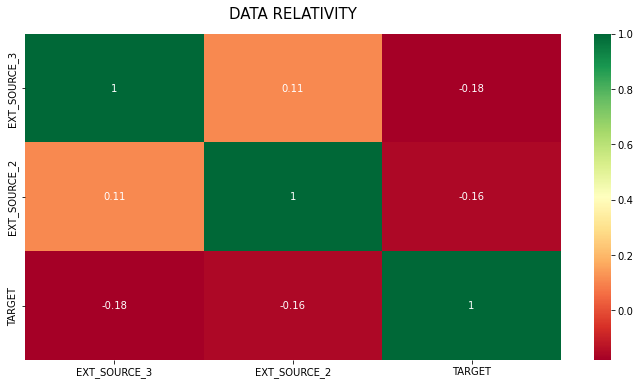

In [24]:
nrel= ["EXT_SOURCE_3","EXT_SOURCE_2"]  # Store not relevant data in "nrel"
plt.figure(figsize= [12,6]) 
sns.heatmap(ap_dt[nrel+["TARGET"]].corr(), cmap="RdYlGn",annot=True)
plt.title("DATA RELATIVITY", fontdict={"fontsize":15}, pad=15)
plt.show() #see the graph for relativity

- There seems to be no relation and also from columns description we decided to remove these columns also correation doesn't cause causation

In [25]:
#remove the data of  EXT_SOURCE_3, > EXT_SOURCE_2, As its of no relevent.
ap_dt= ap_dt.drop(columns=(nrel))

In [26]:
#lets check left over data columns.
print("We have",ap_dt.shape,"Rows & Column respectively")

We have (307511, 71) Rows & Column respectively


## 3.0 Now we will check columns with FLAGS and their relation with TARGET columns to remove irrelevant ones

#### For this we will create a dataframe containig all FLAG columns and then plot bar graphs for each column with respect to TARGET column for which "0" will represent as Repayer and "1" will represent as Defaulter

In [27]:
# adding all flags coloumns in variable "Col_flag"
col_flag = [col for col in ap_dt.columns if "FLAG" in col]
col_flag # Viewing all FLAG columns

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

### 3.1 Creating "dt_flg" dataframe having all FLAG columns and "TARGET" column

In [28]:
#creating "dt_flg" dataframe having all FLAG columns and "TARGET" column
dt_flg = ap_dt[col_flag+["TARGET"]]
dt_flg

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,N,N,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,N,Y,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,N,Y,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
#So  we can use terminology of banks "Defaulters and Repayesr.
#lets replace "0" as repayer and "1" as defaulter for TARGET column.
dt_flg["TARGET"] = dt_flg["TARGET"].replace({1:"Defaulter", 0:"Repayer"})
dt_flg # check the TARGET Column changed from 0, 1 to Defaulters and Repayers. 

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Defaulter
1,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Repayer
2,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Repayer
3,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Repayer
4,N,Y,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Repayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,N,N,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Repayer
307507,N,Y,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Repayer
307508,N,Y,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Repayer
307509,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Defaulter


In [30]:
# Columnn description stated that replacing "1" as Y being TRUE and "0" as N being False. Lets get it done.
for i in dt_flg:
    if i!= "TARGET":
        dt_flg[i] = dt_flg[i].replace({1:"Y", 0:"N"})
        
dt_flg # Here it is, we have changed it! 1's are "Y", 0's are "N"

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,Y,Y,N,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Defaulter
1,N,N,Y,Y,N,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
2,Y,Y,Y,Y,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
3,N,Y,Y,Y,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
4,N,Y,Y,Y,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,N,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
307507,N,Y,Y,N,N,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
307508,N,Y,Y,Y,N,Y,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
307509,N,Y,Y,Y,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Defaulter


### 3.1 Lets get some tools:  itertools for efficient looping plotting sub-plots.

#### Plotting all the graph to find the relation and evaluting for dropping such columns

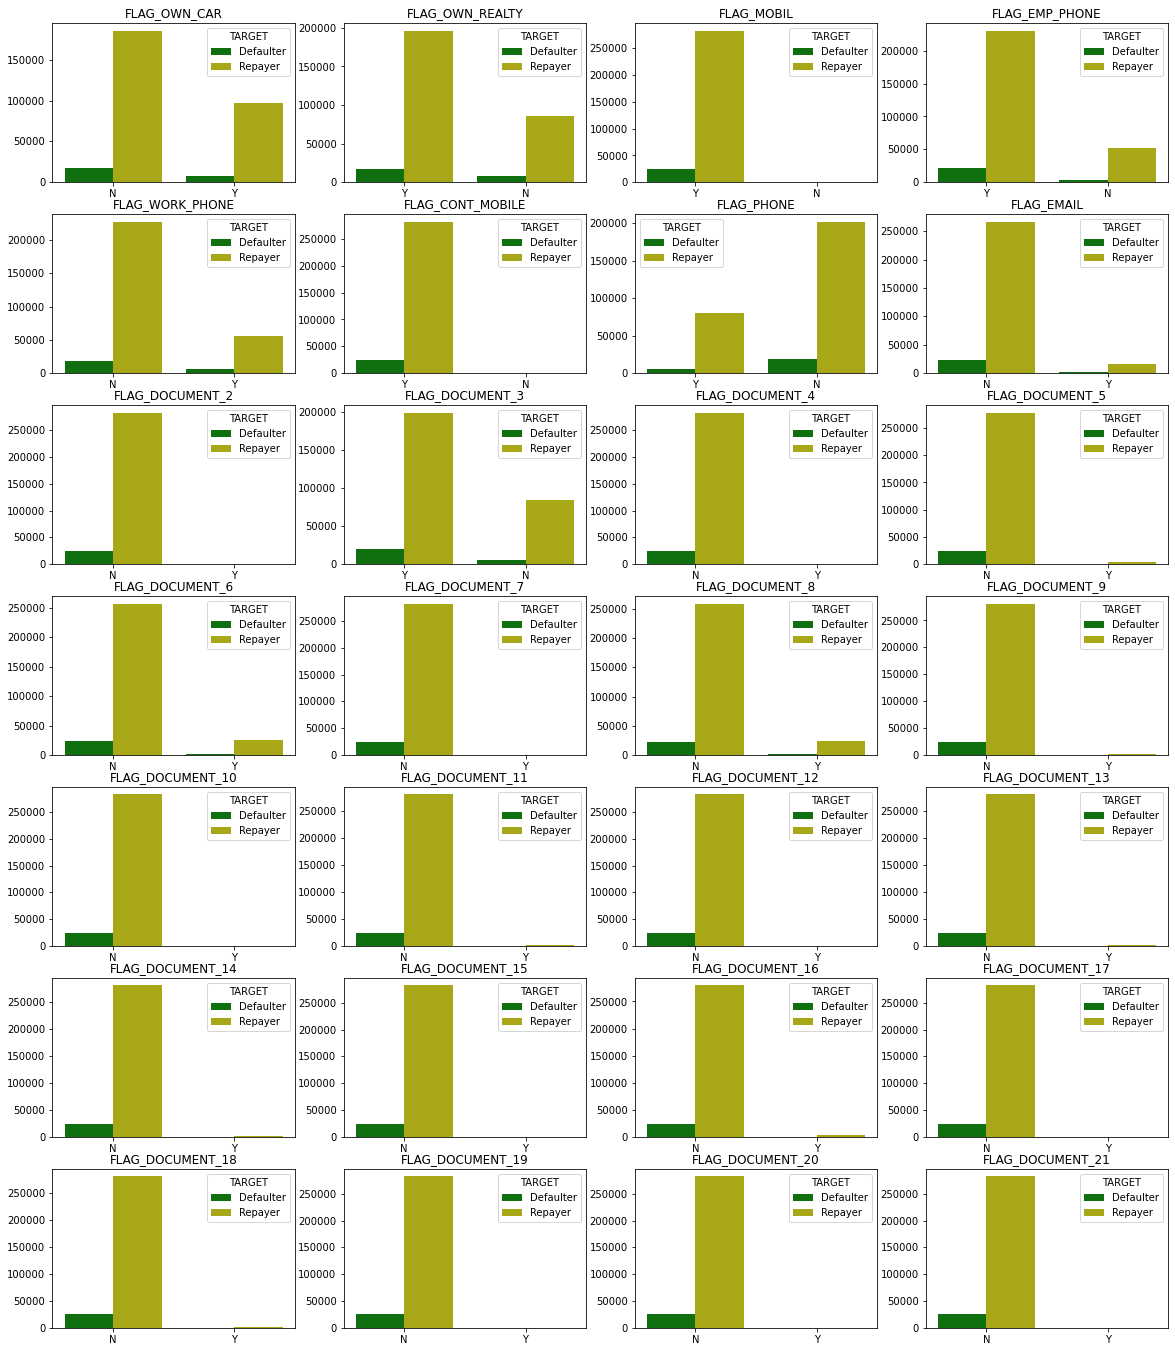

In [31]:
import itertools 
plt.figure(figsize = [20,24])
for i,j in itertools.zip_longest(col_flag,range(len(col_flag))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(dt_flg[i], hue = dt_flg["TARGET"], palette = ["g","y",])
    plt.yticks(fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

### 3.2 Summary of Flag columns:

- Columns mentioned below are have more repayers than defaulters:
    * (FLAG_OWN_REALTY, 
    * FLAG_MOBIL ,
    * FLAG_EMP_PHONE,
    * FLAG_CONT_MOBILE,
    * FLAG_DOCUMENT_3
    
    
- These columns make relativity thus we can include these below columns:
     * FLAG_DOCUMENT_3,
     * FLAG_OWN_REALTY, 
     * FLAG_MOBIL
     
     
- We can remove all other FLAG columns..

In [32]:
# removing required columns from "dt_flag" such that we can remove the irrelevent columns from "ap_dt" dataset.
dt_flg.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)

In [33]:
len(dt_flg.columns)

25

In [34]:
# dropping the columns of "flag_df" dataframe that is removing more 25 columns from "appl_data" dataframe
ap_dt=ap_dt.drop(columns=dt_flg)

In [35]:
# lets check how many columns are left which contains required value!
print("After removing irrelevent columns, we left with",ap_dt.shape,"Rows and Columns Respectively")

After removing irrelevent columns, we left with (307511, 46) Rows and Columns Respectively


## 4.0 Imputing values 


### 4.1  Continue with above mentioned Occupation imputation (pnt no. 2.7)
        - Lets Check out the Occupation Nulls and fill them with new values

In [36]:
# occupation column,lets check what kind of data stored in this column.  
ap_dt.OCCUPATION_TYPE.head(10)
# As we saw the data earlier; Occupation have different type of categories.

0       Laborers
1     Core staff
2       Laborers
3       Laborers
4     Core staff
5       Laborers
6    Accountants
7       Managers
8            NaN
9       Laborers
Name: OCCUPATION_TYPE, dtype: object

In [37]:
#lets check the Values in Percentage of each category present in "OCCUPATION_TYPE"
ap_dt["OCCUPATION_TYPE"].value_counts(normalize=True*100)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [38]:
#from above it looks like this columnn is categorical one and have missing values of 31.35%. 
#to fix this we will impute another category as "Unknown" for the missing values.
ap_dt["OCCUPATION_TYPE"] = ap_dt["OCCUPATION_TYPE"].fillna("Unknown")

In [39]:
ap_dt["OCCUPATION_TYPE"].isnull().sum() # Now we have zero null values 

0

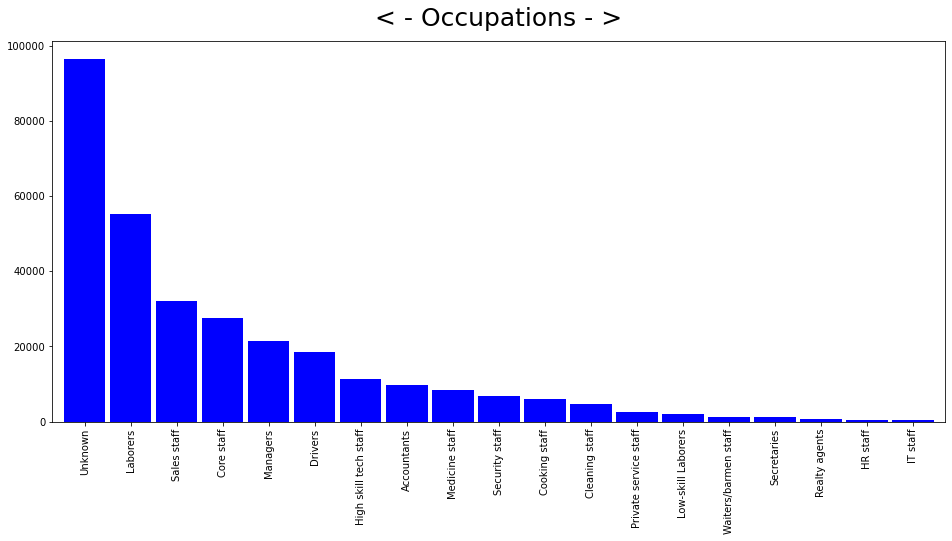

In [40]:
# Plotting a percentage graph having each category of "OCCUPATION_TYPE"
plt.figure(figsize = [16,7])
(ap_dt["OCCUPATION_TYPE"].value_counts()).plot.bar(color= "blue",width = .9)
plt.title("< - Occupations - >", fontdict={"fontsize":25}, pad =15)
plt.show()

#### * First Highest percentage is: "Unknown"
#### * Second Highest percentage is: "Laborers"

### 4.2 let's find other columns which make litle contribution for data cleaning :
-below are the columns: 
"AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON", -"AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"

  -   As mentioned in Column Description file; 
        * These above columns represent number of enquries made for the customer(which should be discrete and not continous). 
        * from above describe results we see that all values are numerical and can conclude that for imputing missing we should not use mean as it is in decimal form,
        * hence for imputing purpose we will use median for all these columns.

In [41]:
#find numaric Values
ap_dt[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


In [42]:
#creating "debt" variable having these columns "AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
#"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"
debt= ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"] 

In [43]:
#filling missing values with median values
ap_dt=ap_dt.fillna(ap_dt[debt].median())

In [44]:
print(nulls(ap_dt).head(10)) #Check Null values, How mauch percentage are left in application Data File.
print()
print("So, These are the above Columns presents with Null Values ")

NAME_TYPE_SUITE             0.42
DEF_60_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_30_CNT_SOCIAL_CIRCLE    0.33
AMT_GOODS_PRICE             0.09
AMT_ANNUITY                 0.00
CNT_FAM_MEMBERS             0.00
DAYS_LAST_PHONE_CHANGE      0.00
ORGANIZATION_TYPE           0.00
dtype: float64

So, These are the above Columns presents with Null Values 


- By Looking into above null values, There are very few columns consist null values. So that wont contibute much. lets leave them

___

## 5.0 Standardize the Values 

#### Now We will check what is current condition of ap_dt file. we have done lot of brushing to get a proper data.  

### 5.1 Numeric Values (+ Ve /- Ve / Others)

In [45]:
ap_dt.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,1.422245,0.143421,1.405292,0.100049,-962.858788,0.710023,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,2.400989,0.446698,2.379803,0.362291,826.808487,0.453752,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,-274.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,1.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


- From above describe result we can see that;

      - very high value data columns:
                - AMT_INCOME_TOTAL, 
                - AMT_CREDIT, 
                - AMT_GOODS_PRICE 
- Convert these numerical columns in categorical columns for better understanding.

       - negative values Data columns: 
                - DAYS_BIRTH, 
                - DAYS_EMPLOYED,
                - DAYS_REGISTRATION,
                - DAYS_ID_PUBLISH, 
                - DAYS_LAST_PHONE_CHANGE. 
- Need to Make it correct those values convert DAYS_BIRTH to AGE in years , DAYS_EMPLOYED to YEARS EMPLOYED.

### 5.2 Lets standardize AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE columns: 
        - It has pricing from 0 to lakhs. so lets make category and divide the pricing.

In [46]:
#Creating bins for income amount in term of Lakhs
ap_dt['AMT_INCOME_TOTAL']= ap_dt['AMT_INCOME_TOTAL']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']
ap_dt['AMT_INCOME_RANGE']= pd.cut(ap_dt['AMT_INCOME_TOTAL'],bins,labels=slot)

In [47]:
round((ap_dt["AMT_INCOME_RANGE"].value_counts()*100),3)

1L-2L        15589800
2L-3L         6517600
0-1L          6369800
3L-4L         1467600
4L-5L          536100
5L-6L          109500
6L-7L           86900
8L-9L           29800
7L-8L           16200
9L-10L           2800
10L Above        1800
Name: AMT_INCOME_RANGE, dtype: int64

In [48]:
#Creating bins for Credit amount in term of Lakhs
ap_dt['AMT_CREDIT']=ap_dt['AMT_CREDIT']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']
ap_dt['AMT_CREDIT_RANGE']=pd.cut(ap_dt['AMT_CREDIT'],bins=bins,labels=slots)

2L-3L        17.825
10L Above    16.255
5L-6L        11.132
4L-5L        10.418
1L-2L         9.801
3L-4L         8.565
6L-7L         7.821
8L-9L         7.087
7L-8L         6.241
9L-10L        2.903
0-1L          1.952
Name: AMT_CREDIT_RANGE, dtype: float64


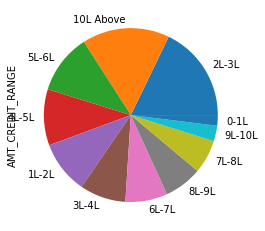

In [49]:
print(round((ap_dt["AMT_CREDIT_RANGE"].value_counts(normalize = True)*100),3))
ap_dt["AMT_CREDIT_RANGE"].value_counts().plot.pie() # Graphical Representation for Data Types.
plt.show()

In [50]:
# Creating bins for Price of Goods in term of Lakhs
ap_dt['AMT_GOODS_PRICE']=ap_dt['AMT_GOODS_PRICE']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']
ap_dt['AMT_GOODS_PRICE_RANGE']=pd.cut(ap_dt['AMT_GOODS_PRICE'],bins=bins,labels=slots)


2L-3L        20.428
4L-5L        18.544
6L-7L        13.027
10L Above    11.105
1L-2L        10.727
8L-9L         6.993
3L-4L         6.906
5L-6L         4.269
0-1L          2.835
7L-8L         2.640
9L-10L        2.526
Name: AMT_GOODS_PRICE_RANGE, dtype: float64


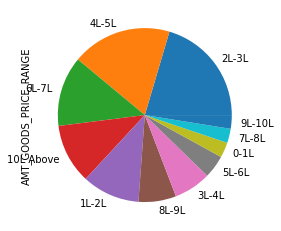

In [51]:
print(round((ap_dt["AMT_GOODS_PRICE_RANGE"].value_counts(normalize = True)*100),3))
ap_dt["AMT_GOODS_PRICE_RANGE"].value_counts().plot.pie() # Graphical Representation for Data Types.
plt.show()

### 5.2 Lets standardize -ve Columns:
   #### DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH,  DAYS_LAST_PHONE_CHANGE.
         

In [52]:
# creating "days_col" varibale to store all days columns
days_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]
(ap_dt[days_col].describe())


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


In [53]:
#"From describe we get that days are in negative that is not usual, so to correct it we use absolute function as below"
ap_dt[days_col]= abs(ap_dt[days_col]) #using abs() function to correct the days values

In [54]:
ap_dt[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


        
        - No Negetive Values present now 

### 5.3 Now convert DAYS_BIRTH, DAYS_EMPLOYED columns

35-40       13.940314
40-45       13.464884
30-35       12.825557
60 Above    11.569993
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
20-25        3.954005
0-20         0.000000
Name: AGE_GROUP, dtype: float64


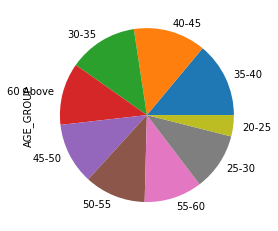

In [55]:
ap_dt["AGE"] = ap_dt["DAYS_BIRTH"]/365 #(dividing by numer of years)
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]
ap_dt["AGE_GROUP"] = pd.cut(ap_dt["AGE"], bins=bins, labels=slots)
print(ap_dt["AGE_GROUP"].value_counts(normalize= True)*100)
ap_dt["AGE_GROUP"].value_counts().plot.pie() # Graphical Representation for Data Types.
plt.show()

0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30 Above     1.191822
Name: EMPLOYEMENT_YEARS, dtype: float64


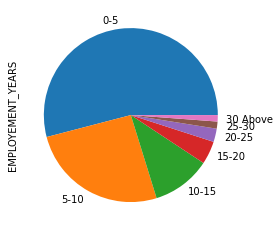

In [56]:
#creating column "EMPLOYEMENT_YEARS" from "DAYS_EMPLOYED"
ap_dt["YEARS_EMPLOYED"] = ap_dt["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]
ap_dt["EMPLOYEMENT_YEARS"] = pd.cut(ap_dt["YEARS_EMPLOYED"], bins=bins, labels=slots)
print(ap_dt["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100)
ap_dt["EMPLOYEMENT_YEARS"].value_counts().plot.pie() # Graphical Representation for Data Types.
plt.show()

## 6.0 Outliers

In [57]:
ap_dt.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979,5.990260,27108.573909,5.383962,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,0.999997,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,1.422245,0.143421,1.405292,0.100049,962.858788,0.710023,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,43.936973,185.547239
std,102790.175348,0.272419,0.722121,2.371231,4.024908,14493.737315,3.694465,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,2.400989,0.446698,2.379803,0.362291,826.808487,0.453752,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,11.956133,382.037676
min,100002.000000,0.000000,0.000000,0.256500,0.450000,1615.500000,0.405000,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000
25%,189145.500000,0.000000,0.000000,1.125000,2.700000,16524.000000,2.385000,0.010006,12413.000000,933.000000,2010.000000,1720.000000,1.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.008219,2.556164
50%,278202.000000,0.000000,0.000000,1.471500,5.135310,24903.000000,4.500000,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,1.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,757.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.150685,6.079452
75%,367142.500000,0.000000,1.000000,2.025000,8.086500,34596.000000,6.795000,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,1.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1570.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.923288,15.635616
max,456255.000000,1.000000,19.000000,1170.000000,40.500000,258025.500000,40.500000,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,1.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,4292.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548,1000.665753


### 6.1- From describe we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below: 

In [58]:
# Outliner Stored in variable "outr"
outr = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE","DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

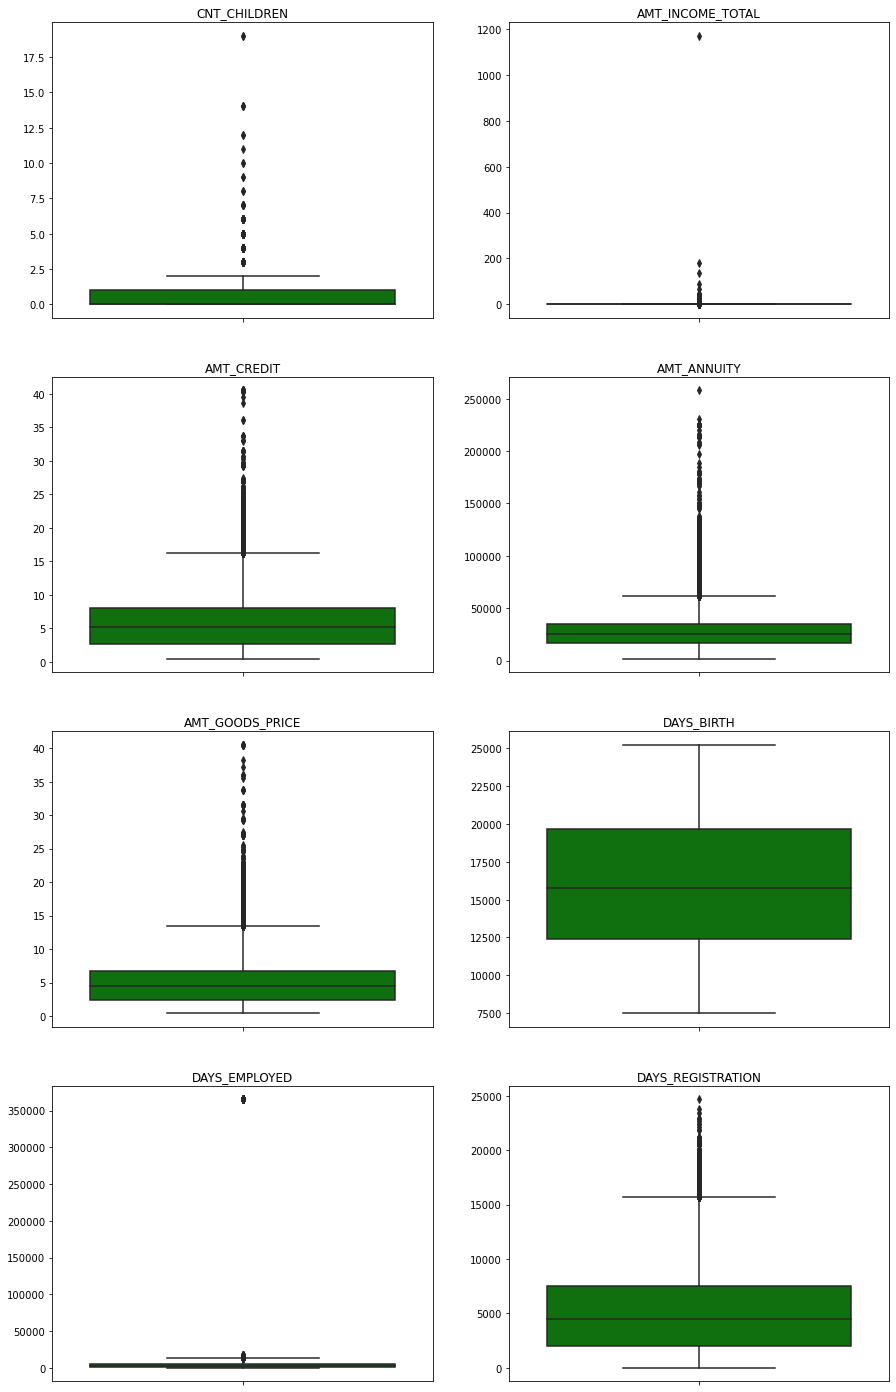

In [59]:
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(outr, range(len(outr))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = ap_dt[i], color = "green")
    #plt.yticks(fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

### 6.2 Summary

- It can be seen that in current application data

* AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.
* AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.
* DAYS_BIRTH has no outliers which means the data available is reliable.
* DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.

In [60]:
#Checking the number of unique values each column possess to identify categorical columns

ap_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_REALTY              307511 non-null  object  
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  object  
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

### 6.3 Converting Desired columns from Object to categorical column

In [61]:
ap_dt.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU

In [62]:
#from the list, we have taken out the desired columns for conversion

categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

for col in categorical_columns:
    ap_dt[col] = pd.Categorical(ap_dt[col])
    
# Converting total of 21 columns to categorical one
len(categorical_columns) 

21

In [63]:
ap_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   CNT_CHILDREN                 307511 non-null  category
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  category
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

## 7.0 Summary on Dataset 


### 7.1 States that: Application_Data.csv:
- There are: 3,07,511 Rows & 53 Colums.
- 3 types of datatypes available:
     - Integers, 
     - Float values,
     - Strings.        
- Found the Null values, Filled them with "Unknown" variable.
- Removed unwanted columns and other columns.
- We have worked on the negative values and converted them into positive values in some of columns.
- We have converted days and hour in proper format.

* Now Data Set-1 looks good. Lets check out with Data set-2 ie, Previous_Application_data 

# 2. Data Set: "Previous_Application_Data.csv":

## 8.0 Read & Understand Data: Previous_application_data.

* So we will repeat the above followed steps to read & Understand the Data file [Previous_application_Data.csv]
      - How many Rows and Columns and columns are there?
      - What are the Datatypes?
      - How many columns are having numeric values: Positive numbers, Negative Numbers
      - Are the data in correct format? (ie,Days, Hours, Months, Years. etc.)

In [64]:
#File is Already Imported. So lets Start with the Analysing.
pr_ap_dt.shape

(1670214, 37)

In [65]:
pr_ap_dt.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
pr_ap_dt.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

object     16
float64    15
int64       6
dtype: int64


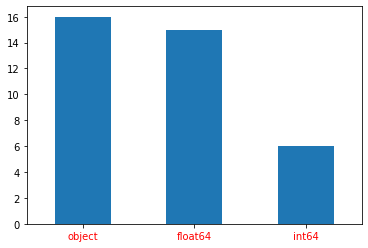

As per below graph "Object" Values are more than Integers and Strings


In [67]:
type1=pr_ap_dt.dtypes #store DTypes for pr_ap_dt
print(type1.value_counts())
type1.value_counts().plot.bar() # Graphical Representation for Data Types.
plt.xticks(rotation=0,color="red")
plt.show()

print("As per below graph \"Object\" Values are more than Integers and Strings")

### 8.1 Numerical Outliners

In [68]:
# Checking the numeric variables of the dataframes
pr_ap_dt.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### 8.2 Summary: 
- There are 37 columns and 1670214 rows.
- There columns having negative, postive values 
- Days are not in proper format 

## 9.0 Null Values 

In [69]:
#Same steps to be followed as we have done for ap_dt File. checking how many null values are present in each of the columns in percentage
print(nulls(pr_ap_dt))

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

### 9.1 Dropping 50% Null Values

In [70]:
nul_50_1 = nulls(pr_ap_dt)[nulls(pr_ap_dt)>50] #creating a variable null_50_1 for storing null columns having missing values more than 50%
print(nul_50_1)
print()
print("These are the values with above 50% Null Values")

RATE_INTEREST_PRIVILEGED    99.64
RATE_INTEREST_PRIMARY       99.64
AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
dtype: float64

These are the values with above 50% Null Values


In [71]:
pr_ap_dt= pr_ap_dt.drop(columns = nul_50_1.index) #dropping null columns having missing values more than 50%

In [72]:
pr_ap_dt.shape

(1670214, 33)

### 9.2 Calculating 15% Null Values

In [73]:
nul_15_1 = nulls(pr_ap_dt)[nulls(pr_ap_dt)>15] #creating a variable null_15_1 for storing null columns having missing values more than 50%
print(nul_15_1)
print()
print("These are the values with above 50% Null Values")

NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

These are the values with above 50% Null Values


In [74]:
pr_ap_dt.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [75]:
pr_ap_dt.shape

(1670214, 33)

In [76]:
pr_ap_dt.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

### 9.3 Listing down columns which are not needed storing in variable="n_n" 

In [77]:
n_n = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
pr_ap_dt= pr_ap_dt.drop(n_n,axis =1)
pr_ap_dt.shape

(1670214, 29)

In [78]:
#Imputing values "Unknown" as this a categorical column
pr_ap_dt["NAME_TYPE_SUITE"] = pr_ap_dt["NAME_TYPE_SUITE"].fillna("Unknown")
nulls(pr_ap_dt)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
NAME_PRODUCT_TYPE             0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
CHANNEL_TYPE                  0.00
SK_ID_PREV                    0.00
NAME_PORTFOLIO                0.00
SK_ID_CURR                    0.00
NAME_CLIENT_TYPE              0.00
NAME_TYPE_SUITE               0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE            0.00
NAME_GOODS_CATEGORY 

- There are missing values in columns 'DAYS_FIRST_DUE', 'DAYS_TERMINATION',DAYS_FIRST_DRAWING','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE' and these columns counts days we have to keep null values as it is.

In [79]:
#Analysing numerical columns using describe 
pr_ap_dt[nul_15_1.index].describe()

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06
mean,342209.855039,81992.343838,76582.403064,33767.774054,13826.269337,0.332570,2.278473e+05,1.595512e+04,1.605408e+01
std,88916.115834,153303.516729,149647.415123,106857.034789,72444.869708,0.471134,3.153966e+05,1.478214e+04,1.456729e+01
min,-2922.000000,-2874.000000,-2889.000000,-2801.000000,-2892.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,365243.000000,-1270.000000,-1314.000000,-1242.000000,-1628.000000,0.000000,5.084100e+04,6.321780e+03,6.000000e+00
50%,365243.000000,-499.000000,-537.000000,-361.000000,-831.000000,0.000000,1.123200e+05,1.125000e+04,1.200000e+01
75%,365243.000000,-44.000000,-74.000000,129.000000,-411.000000,1.000000,2.340000e+05,2.065842e+04,2.400000e+01
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,6.905160e+06,4.180581e+05,8.400000e+01


### 9.4 Format Convertion

#### 9.4.1 convert negative days to postive days creating a varaible "pr_days"

In [80]:
pr_days = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
pr_ap_dt[pr_days].describe() # Analysis before conversion

,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,-8.806797e+02,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838
std,7.790997e+02,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729
min,-2.922000e+03,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000
25%,-1.300000e+03,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000
50%,-5.810000e+02,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000
75%,-2.800000e+02,365243.000000,-411.000000,129.000000,-74.000000,-44.000000
max,-1.000000e+00,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


#### 9.4.2 Converting Negative days to positive days

In [81]:
pr_ap_dt[pr_days] = abs(pr_ap_dt[pr_days])
pr_ap_dt[nul_15_1.index].describe() # analysing after conversion

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06
mean,342340.056543,83505.775017,78152.730207,35163.363265,15949.224065,0.332570,2.278473e+05,1.595512e+04,1.605408e+01
std,88413.495220,152484.418802,148833.342466,106405.950190,72007.270877,0.471134,3.153966e+05,1.478214e+04,1.456729e+01
min,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,365243.000000,447.000000,455.000000,257.000000,475.000000,0.000000,5.084100e+04,6.321780e+03,6.000000e+00
50%,365243.000000,1171.000000,1155.000000,741.000000,921.000000,0.000000,1.123200e+05,1.125000e+04,1.200000e+01
75%,365243.000000,2501.000000,2418.000000,1735.000000,1825.000000,1.000000,2.340000e+05,2.065842e+04,2.400000e+01
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,6.905160e+06,4.180581e+05,8.400000e+01


### 9.5  Days Group Calculation 

In [82]:
bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365] #e.g. 369 will be grouped as with in 2 years
slots = ["1","2","3","4","5","6","7","7 above"]
pr_ap_dt['YEARLY_DECISION'] = pd.cut(pr_ap_dt['DAYS_DECISION'],bins,labels=slots)
round(pr_ap_dt['YEARLY_DECISION'].value_counts(normalize=True)*100,2)

1          34.35
2          23.06
3          12.86
4           7.88
5           6.13
7           5.81
7 above     5.06
6           4.85
Name: YEARLY_DECISION, dtype: float64

* Almost 34% loan applicatants have applied for a new loan within 1 year of previous loan decision

In [83]:
pr_ap_dt.nunique()

SK_ID_PREV                   1670214
SK_ID_CURR                    338857
NAME_CONTRACT_TYPE                 4
AMT_ANNUITY                   357959
AMT_APPLICATION                93885
AMT_CREDIT                     86803
AMT_GOODS_PRICE                93885
NAME_CASH_LOAN_PURPOSE            25
NAME_CONTRACT_STATUS               4
DAYS_DECISION                   2922
NAME_PAYMENT_TYPE                  4
CODE_REJECT_REASON                 9
NAME_TYPE_SUITE                    8
NAME_CLIENT_TYPE                   4
NAME_GOODS_CATEGORY               28
NAME_PORTFOLIO                     5
NAME_PRODUCT_TYPE                  3
CHANNEL_TYPE                       8
SELLERPLACE_AREA                2097
NAME_SELLER_INDUSTRY              11
CNT_PAYMENT                       49
NAME_YIELD_GROUP                   5
PRODUCT_COMBINATION               17
DAYS_FIRST_DRAWING              2838
DAYS_FIRST_DUE                  2892
DAYS_LAST_DUE_1ST_VERSION       2803
DAYS_LAST_DUE                   2873
D

In [84]:
nulls(pr_ap_dt)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
SK_ID_PREV                    0.00
CHANNEL_TYPE                  0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
SK_ID_CURR                    0.00
NAME_GOODS_CATEGORY           0.00
NAME_CLIENT_TYPE              0.00
NAME_TYPE_SUITE               0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE  

## 10.0 We will now analyse data using "Plot" for further data cleaning process

 #### Now we will deal with continuos variables "AMT_ANNUITY", "AMT_GOODS_PRICE"
#### To impute null values in continuous variables, we plotted the distribution of the columns and used 
- median if the distribution is skewed 
- mode if the distribution pattern is preserved.

### 10.1 plotting a kdeplot to understand distribution of "AMT_ANNUITY"

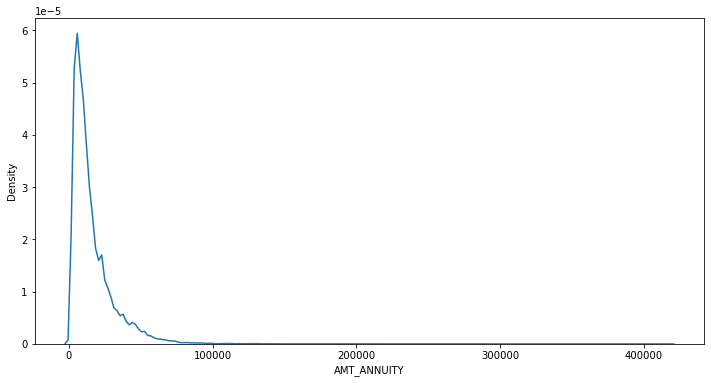

There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.


In [85]:
plt.figure(figsize=(12,6))
sns.kdeplot(pr_ap_dt['AMT_ANNUITY'])
plt.show()
print("There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.")

In [86]:
#imputing missing values with median 
pr_ap_dt['AMT_ANNUITY'].fillna(pr_ap_dt['AMT_ANNUITY'].median(),inplace = True)

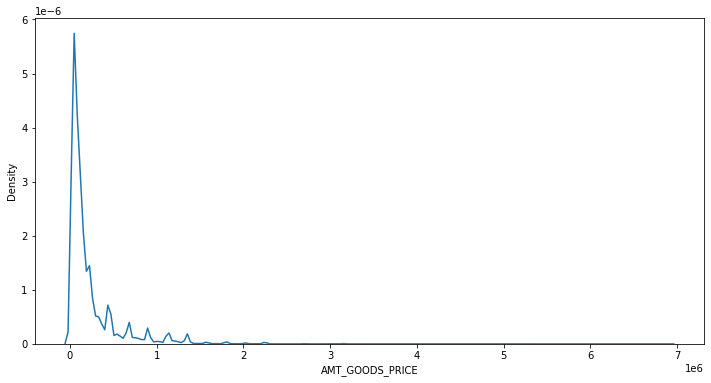


There are several peaks along the distribution. Let's impute using the mode, mean and median and see if the distribution is still about the same.


In [87]:
# Plotting kde plot for "AMT_GOODS_PRICE" to understand the distribution
plt.figure(figsize=(12,6))
sns.kdeplot(pr_ap_dt['AMT_GOODS_PRICE'])
plt.show()
print()
print("There are several peaks along the distribution. Let's impute using the mode, mean and median and see if the distribution is still about the same.")

### 10.2 Creating new dataframe for "AMT_GOODS_PRICE" with columns imputed with mode, median and mean


The original distribution is closer with the distribution of data imputed with mode in this case, thus will impute mode for missing values


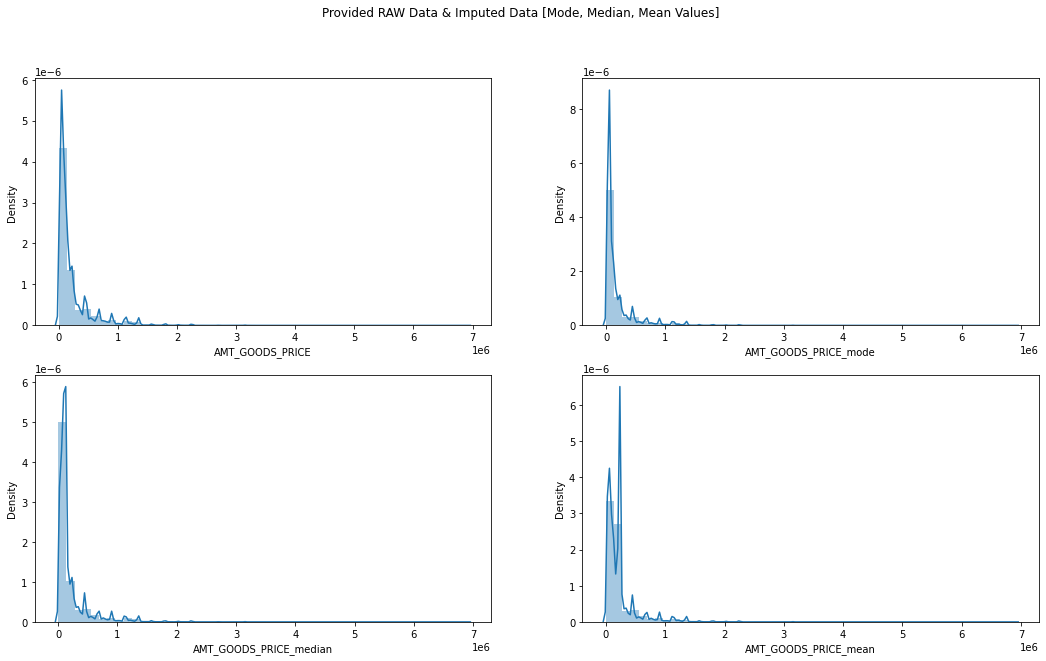

In [88]:
DF = pd.DataFrame() 
DF['AMT_GOODS_PRICE_mode'] = pr_ap_dt['AMT_GOODS_PRICE'].fillna(pr_ap_dt['AMT_GOODS_PRICE'].mode()[0])
DF['AMT_GOODS_PRICE_median'] = pr_ap_dt['AMT_GOODS_PRICE'].fillna(pr_ap_dt['AMT_GOODS_PRICE'].median())
DF['AMT_GOODS_PRICE_mean'] = pr_ap_dt['AMT_GOODS_PRICE'].fillna(pr_ap_dt['AMT_GOODS_PRICE'].mean())

cl = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Provided RAW Data & Imputed Data [Mode, Median, Mean Values]')
plt.subplot(221)
sns.distplot(pr_ap_dt['AMT_GOODS_PRICE'][pd.notnull(pr_ap_dt['AMT_GOODS_PRICE'])]);
for i in enumerate(cl): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(DF[i[1]])
    
print()   
print("The original distribution is closer with the distribution of data imputed with mode in this case, thus will impute mode for missing values")

In [89]:
# Imputing null values with mode
pr_ap_dt['AMT_GOODS_PRICE'].fillna(pr_ap_dt['AMT_GOODS_PRICE'].mode()[0], inplace=True)

Imputing CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:

In [90]:
#taking out values count for NAME_CONTRACT_STATUS categories where CNT_PAYMENT have null values.
pr_ap_dt.loc[pr_ap_dt['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [91]:
pr_ap_dt['CNT_PAYMENT'].fillna(0,inplace = True)  #imputing null values as 0
pr_ap_dt.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'YEARLY_DECISION'], dtype='object')

In [92]:
#Converting required categoical columns from Object to categorical 
cat_cl = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']
for cl in cat_cl:
    pr_ap_dt[cl] =pd.Categorical(pr_ap_dt[cl])

## 11.0 Finding outliers

In [93]:
pr_ap_dt.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,8.806797e+02,3.139511e+02,1.247621e+01,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,0.332570
std,5.325980e+05,1.028148e+05,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.790997e+02,7.127443e+03,1.447588e+01,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.461857e+06,1.893290e+05,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,2.800000e+02,-1.000000e+00,0.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,5.810000e+02,3.000000e+00,1.000000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000,0.000000
75%,2.384280e+06,3.675140e+05,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,1.300000e+03,8.200000e+01,1.600000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


 `-   ("from describe we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below")

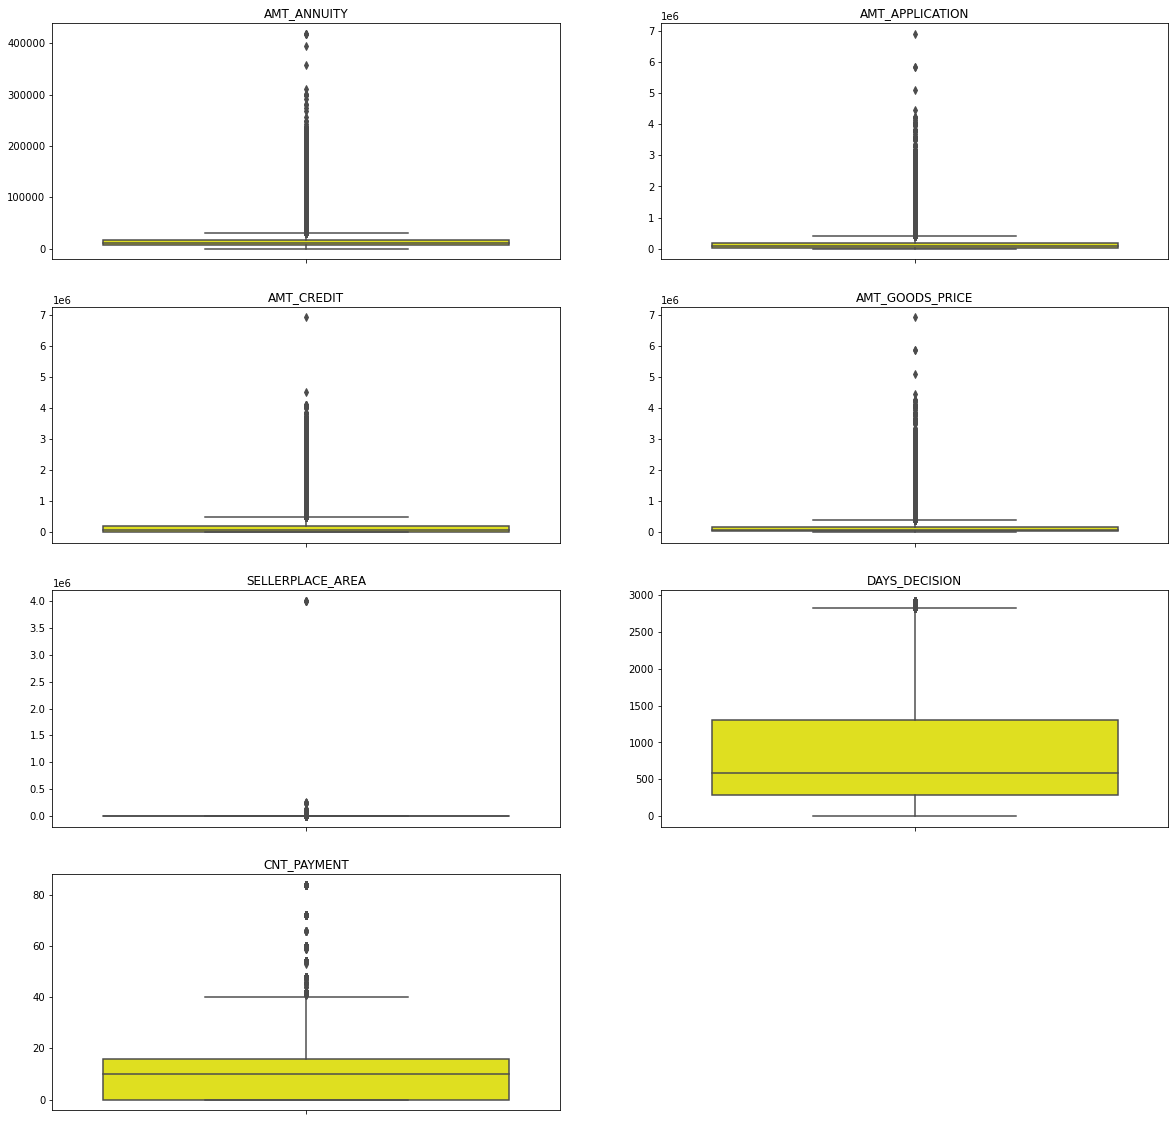

In [94]:
pr_outr_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

plt.figure(figsize=[20,20])
for i,j in itertools.zip_longest(pr_outr_col, range(len(pr_outr_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = pr_ap_dt[i], color = "Yellow")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

### 11.1 Summary It can be seen that in previous application data

1. AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA consist max. number of outliers.
2. CNT_PAYMENT consist less outlier values.
3. DAYS_DECISION has little number of outliers indicating that these previous applications decisions.

## 12.0 Clearing  Anomalies in Data.

What are we going to do in this segment?

            - Check for Imbalance in Data
            - Categorize Data, segmented Univariate Analysis, Bi/Multivariate Analysis,Numeric Data Analysis
            - Bi-furcation of databased based on TARGET data
            - Correlation Matrix
            - Numerical segmented Univariate Analysis, Numerical Bi/Multivariate analysis


### 12.1 Check for Imbalance in Data

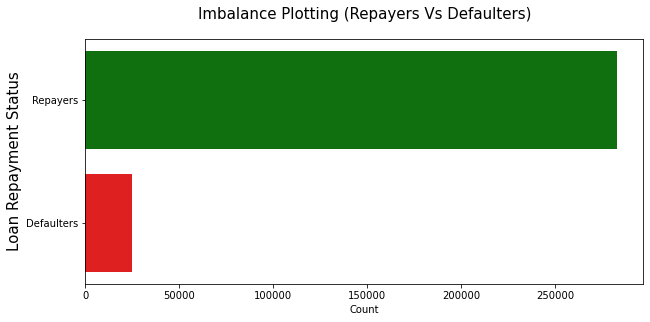

In [95]:
# Basically We need to know about main segments called Repayers & Defaulters 

plt.figure(figsize= [10,4.5])
sns.barplot(y=["Repayers","Defaulters"], x = ap_dt["TARGET"].value_counts(), palette = ["g","r"] )
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":10})
plt.title("Imbalance Plotting (Repayers Vs Defaulters)", fontdict = {"fontsize":15}, pad = 20)
plt.show()

In [96]:
# Percentage with respect to defaulter and repayer is given below 
repayer = round((ap_dt["TARGET"].value_counts()[0]/len(ap_dt)* 100),2)
print("Repayer Percentage is {}%".format(repayer))
defaluter = round((ap_dt["TARGET"].value_counts()[1]/len(ap_dt)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))
print("Imbalance Ratio with respect to Repayer and Defaulter is given: {0:.2f}/1 (approx)".format(repayer/defaluter))

Repayer Percentage is 91.93%
Defaulter Percentage is 8.07%
Imbalance Ratio with respect to Repayer and Defaulter is given: 11.39/1 (approx)


### 12.2 Plotting Functions

Important Function for Univariate analysis
Creating a function for plotting Variables to do univariate analysis. This function will create two plots

Count plot of given column w.r.t TARGET column
Percentage of defaulters within that column
The function is taking 6 arguments

dataset : to put the dataset we want to use
col : column name for which we need to the analysis
target_col : column name for with which we will be comparing
ylog : to have y-axis in log10 terms, in case the plot is not readable
x_label_angle : to maintain the orientation of x-axis labels
h_layout : to give horizontal layout of the subplots

In [97]:
# Creating a function to find if the column is categorical or numerical 

def data_type(dataset,col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "category":
        return "categorical"
    
# Creating a function "univariate" to perform analysis one single variable with respect to target variable

def univariate(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    if data_type(dataset,col) == "numerical":
        sns.distplot(dataset[col],hist=False)
        
        
    elif data_type(dataset,col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index,'count': val_count.values})
        
        
        target_1_percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col]*100
        target_1_percentage.sort_values(by=target_col,inplace = True)
        
        
# If the plot is not readable, use the log scale

        if(h_layout):
            fig, (cn1, cn2) = plt.subplots(ncols=2, figsize=(15,7))
        else:
            fig, (cn1, cn2) = plt.subplots(nrows=2, figsize=(25,35))
              
        
# 1. Subplot 1: Count plot of the column
        
        sp = sns.countplot(ax=cn1, x=col, data=dataset, hue=target_col, palette = ["g","r","y","b"] )
        cn1.set_title(col, fontsize = 20)
        cn1.legend(['Repayer','Defaulter'])
        cn1.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            sp.set_xticklabels(sp.get_xticklabels(),rotation=75)
        
# 2. Subplot 2: Percentage of defaulters within the column
        
        sp = sns.barplot(ax=cn2, x = col, y=target_col, data=target_1_percentage,)
        cn2.set_title("Defaulters % in "+col, fontsize = 20)    
        cn2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        cn2.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            sp.set_xticklabels(sp.get_xticklabels(),rotation=75)
            
            
# If the plot is not readable, use the log scale
                
        if ylog:
            cn1.set_yscale('log')
            cn1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
        else:
            cn1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})

        
        plt.show()

In [98]:
# function for plotting repetitive rel plots in bivaritae numerical analysis

def bivariate_n(x,y,df,hue,kind,labels):
    plt.figure(figsize=[15,15])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=45, ha='right')
    plt.show()
    

In [99]:
# function for plotting repetitive barplots in bivariate categorical analysis

def bivariate_c(x,y,df,hue,figsize,labels):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontsize = 15)    
    plt.ylabel(y,fontsize = 15)    
    plt.title(col,fontsize = 20) 
    plt.xticks(ha='right')
    plt.legend(labels = labels )
    plt.show()

In [100]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)     
    else:
        plt.ylabel("Count",fontsize=15)       

    plt.title(col , fontsize=20) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')
    
    plt.show()

In [101]:
# Function to plot point plots 

def pointplot(df,hue,x,y):
    plt.figure(figsize=(12,6))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.title(x+" VS "+y,fontsize = 15)


In [102]:
# storing numnercial and categorical columns as list in belows varibles
cat_col = list(ap_dt.select_dtypes(["category"]).columns)   # Cat columns list
num_col = list(ap_dt.select_dtypes(["int","float"]).columns)  # Num Column list

### 12.3 Categorical Univariate Variables Analysis

#### 12.3.1  Gender wise Analysis

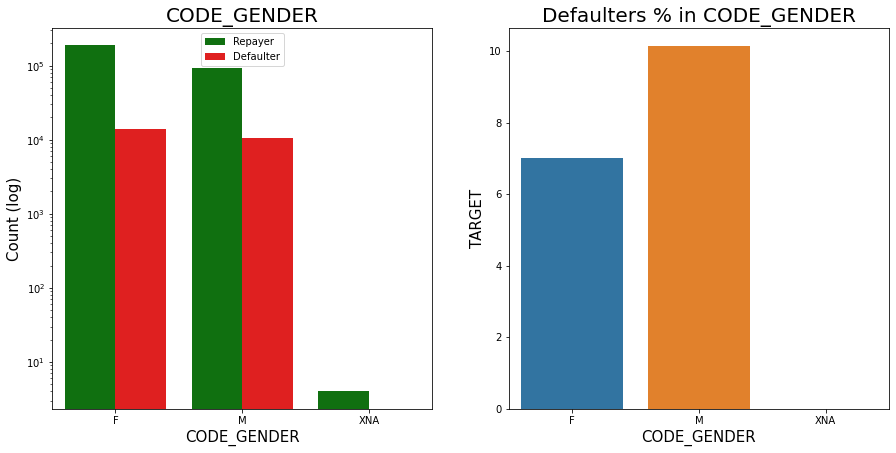


Based on the percentage of default credits, males have a higher chance of not returning their loans, comparing with women about


In [103]:
# Checking the type of Gender on loan repayment status
univariate(ap_dt,"CODE_GENDER","TARGET",True,False,True)
print()
print("Based on the percentage of default credits, males have a higher chance of not returning their loans, comparing with women about")

#### 12.3.2 Education wise Analysis 

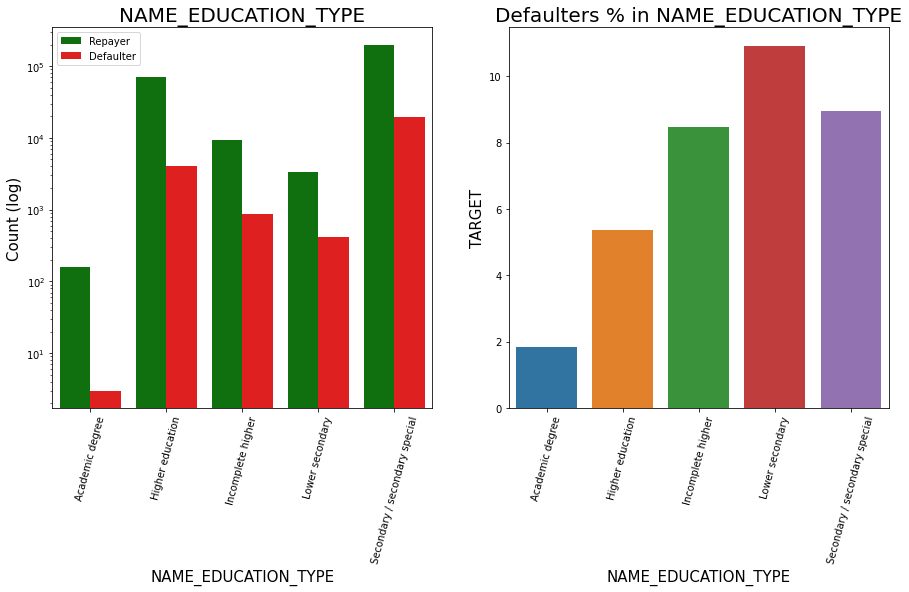


Majority of clients have Secondary/secondary special education, followed by clients with Higher education.
Very few clients have an academic degree Lower secondary category have highest rate of defaulter.
People with Academic degree are least likely to default.


In [104]:
# Analyzing Education on loan repayment status
univariate(ap_dt,"NAME_EDUCATION_TYPE","TARGET",True,True,True)
print()
print("Majority of clients have Secondary/secondary special education, followed by clients with Higher education.\nVery few clients have an academic degree Lower secondary category have highest rate of defaulter.\nPeople with Academic degree are least likely to default.")

#### 12.3.3 Income wise Analysis

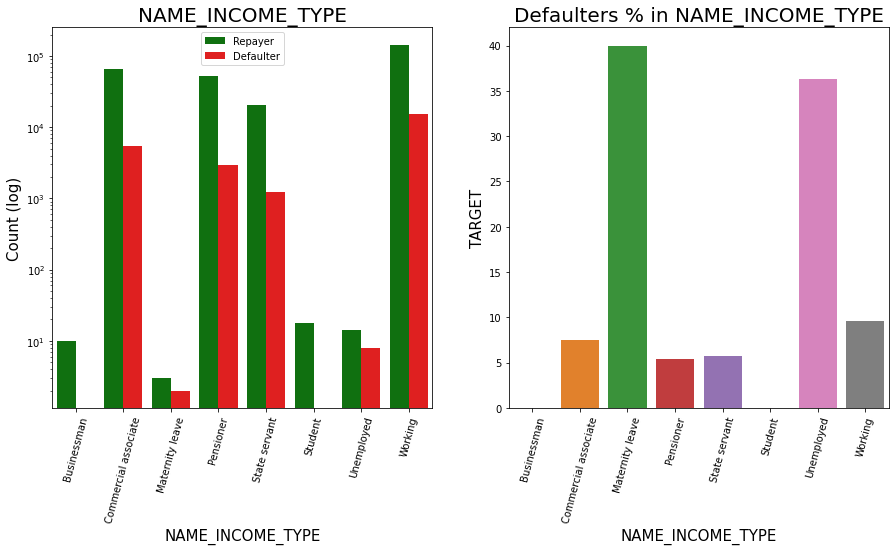


Most of applicants for loans income type is Working, followed by Commercial associate, Pensioner and State servant.
The applicants who are on Maternity leave have defaulting percentage of 40% which is the highest, followed by Unemployed (37%).
The rest under average around 10% defaultees.
Student and Businessmen though less in numbers, do not have default record. Safest two categories for providing loan.


In [105]:
#Analyzing Income on loan repayment status
univariate(ap_dt,"NAME_INCOME_TYPE","TARGET",True,True,True)
print()
print("Most of applicants for loans income type is Working, followed by Commercial associate, Pensioner and State servant.\nThe applicants who are on Maternity leave have defaulting percentage of 40% which is the highest, followed by Unemployed (37%).\nThe rest under average around 10% defaultees.\nStudent and Businessmen though less in numbers, do not have default record. Safest two categories for providing loan.")

#### 12.3.4 Contract wise  Analysis

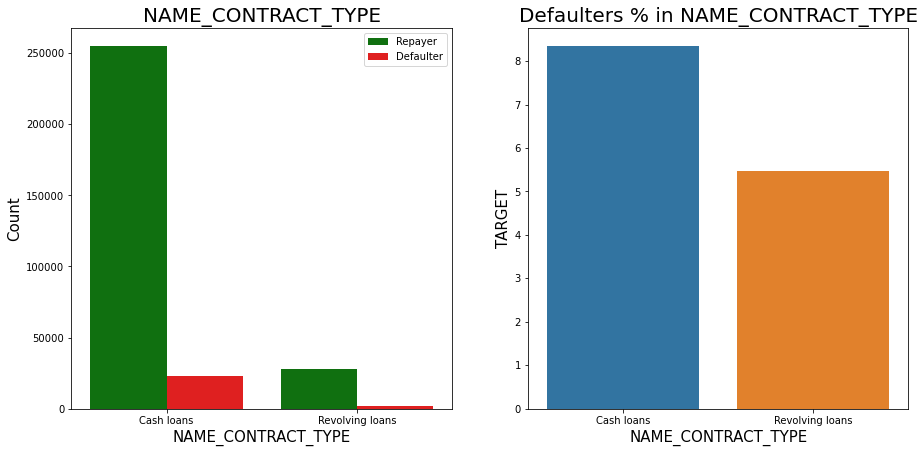


Contract type: Revolving loans are just a small fraction (10%) from the total number of loans Around 8-9% Cash loan applicants and 5-6% Revolving loan applicant are in defaulters


In [106]:
#Checking the contract wise on loan repayment status
univariate(ap_dt,"NAME_CONTRACT_TYPE","TARGET",False,False,True)
print()
print("Contract type: Revolving loans are just a small fraction (10%) from the total number of loans Around 8-9% Cash loan applicants and 5-6% Revolving loan applicant are in defaulters")

#### 12.3.5 Real Estate  Analysis

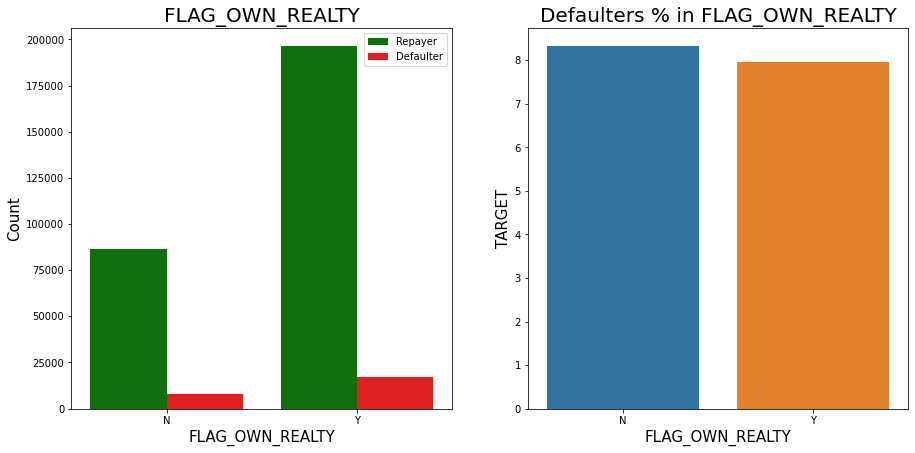


The clients who own real estate are more than double of the ones that don't own.
The defaulting rate of both categories are around the same (~8%).
Thus we can infer that there is no correlation between owning a reality and defaulting the loan.


In [107]:
#3 Checking if owning a real estate is related to loan repayment status
univariate(ap_dt,"FLAG_OWN_REALTY","TARGET",False,False,True)
print()
print("The clients who own real estate are more than double of the ones that don't own.\nThe defaulting rate of both categories are around the same (~8%).\nThus we can infer that there is no correlation between owning a reality and defaulting the loan.")

#### 12.3.6 Family Analysis

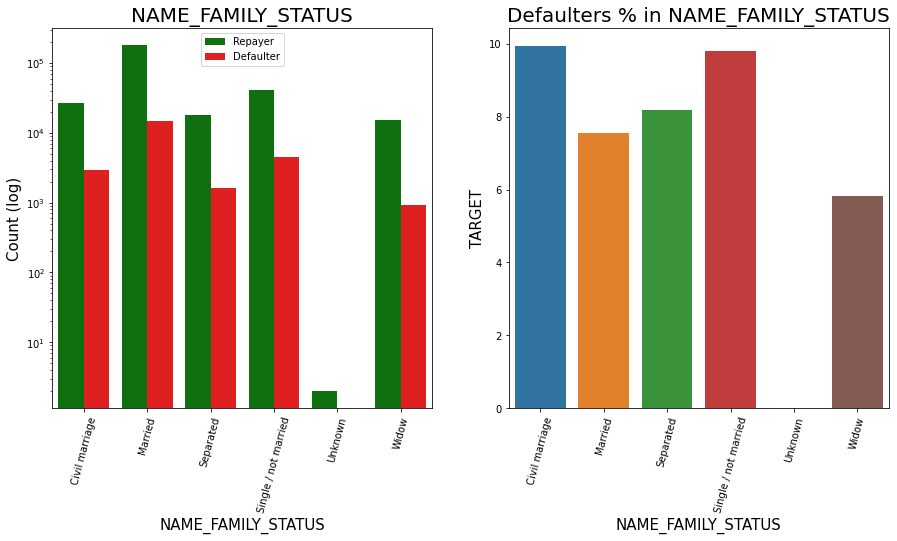


Most of the people who have taken loan are married, followed by Single/not married and civil marriage. In Percentage of 
defaulters Civil marriage has the highest percent around and widow has the lowest.


In [108]:
#5 Analyzing Family status based on loan repayment status
univariate(ap_dt,"NAME_FAMILY_STATUS","TARGET",True,True,True)
print()
print("Most of the people who have taken loan are married, followed by Single/not married and civil marriage. In Percentage of \ndefaulters Civil marriage has the highest percent around and widow has the lowest.")

#### 12.3.7 Occupation Analysis

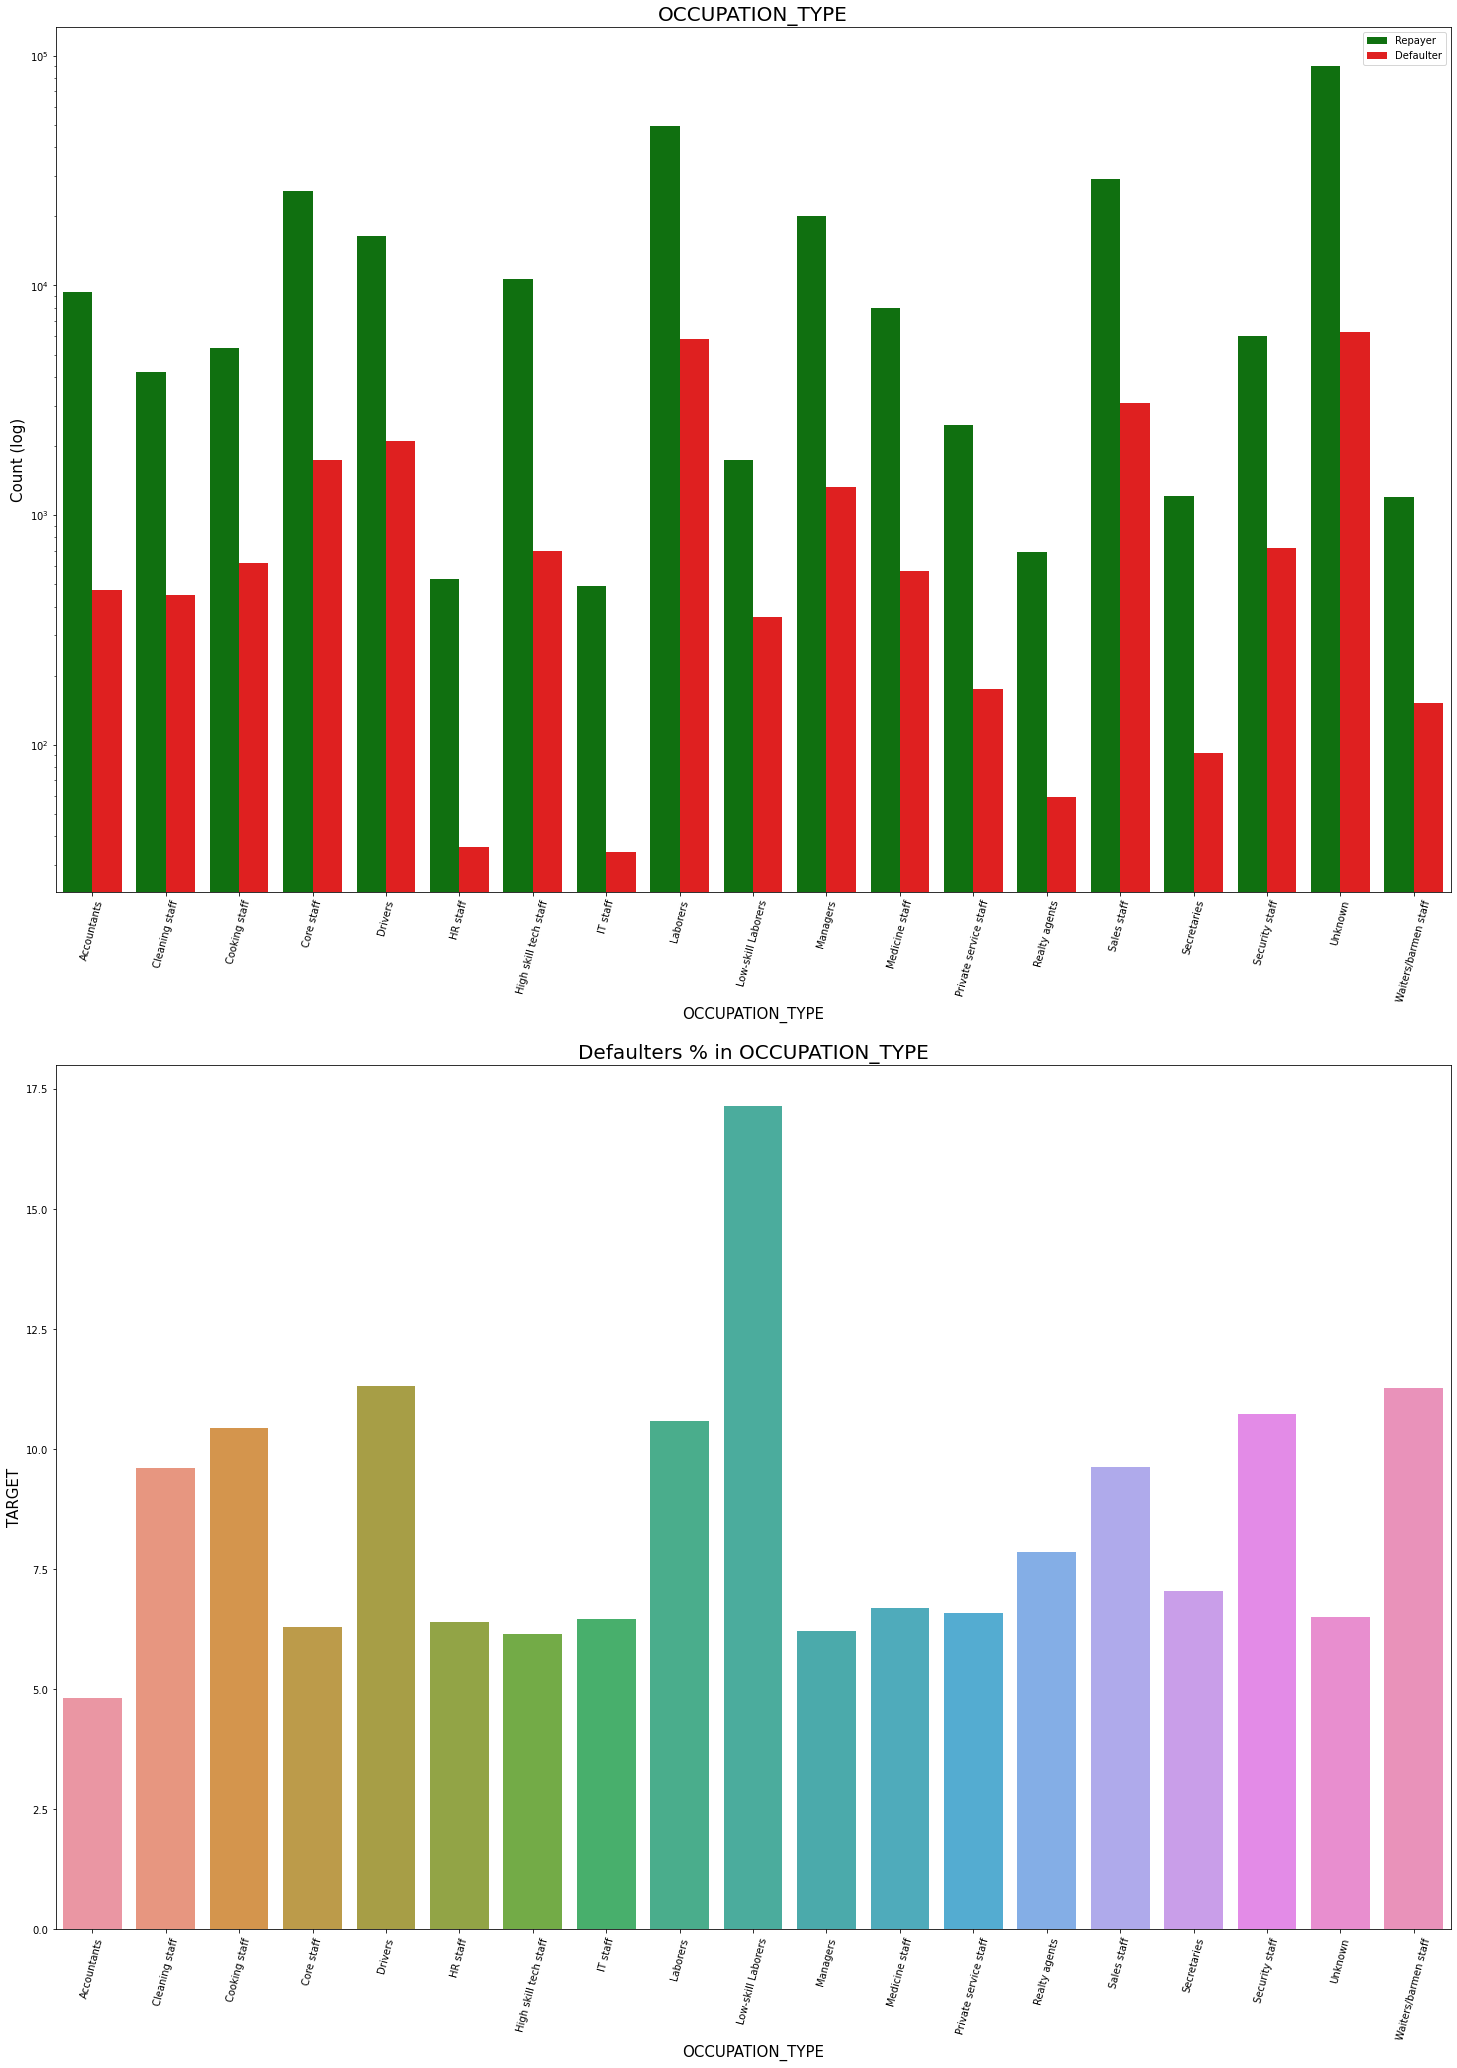

Category with highest percent of defautess are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.
IT staff are less likely to apply for Loan.


In [109]:
#Analyzing Occupation Type where applicant lives based on loan repayment status
univariate(ap_dt,"OCCUPATION_TYPE","TARGET",True,True,False)
print("Category with highest percent of defautess are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.\nIT staff are less likely to apply for Loan.")

#### 12.3.8 No. Family Members Analysis

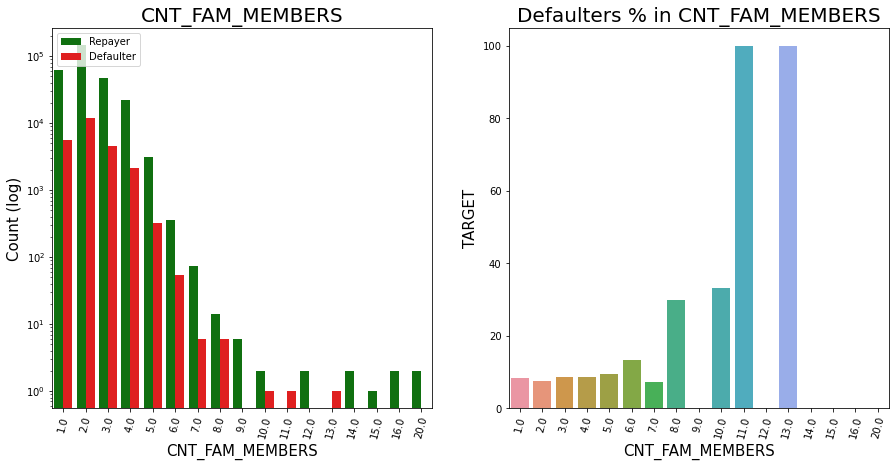

In [110]:
#Analyzing Number of family members based on loan repayment status
univariate(ap_dt,"CNT_FAM_MEMBERS","TARGET",True,True,True)

#### 12.3.9 No. Children Analysis

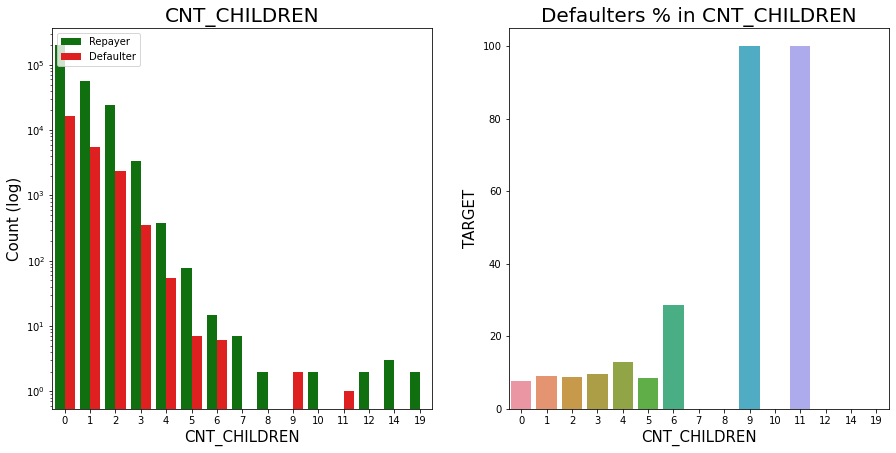

In [111]:
#Analyzing Number of children based on loan repayment status
univariate(ap_dt,"CNT_CHILDREN","TARGET",True,False,True)

#### 12.3.10 Organization Analysis

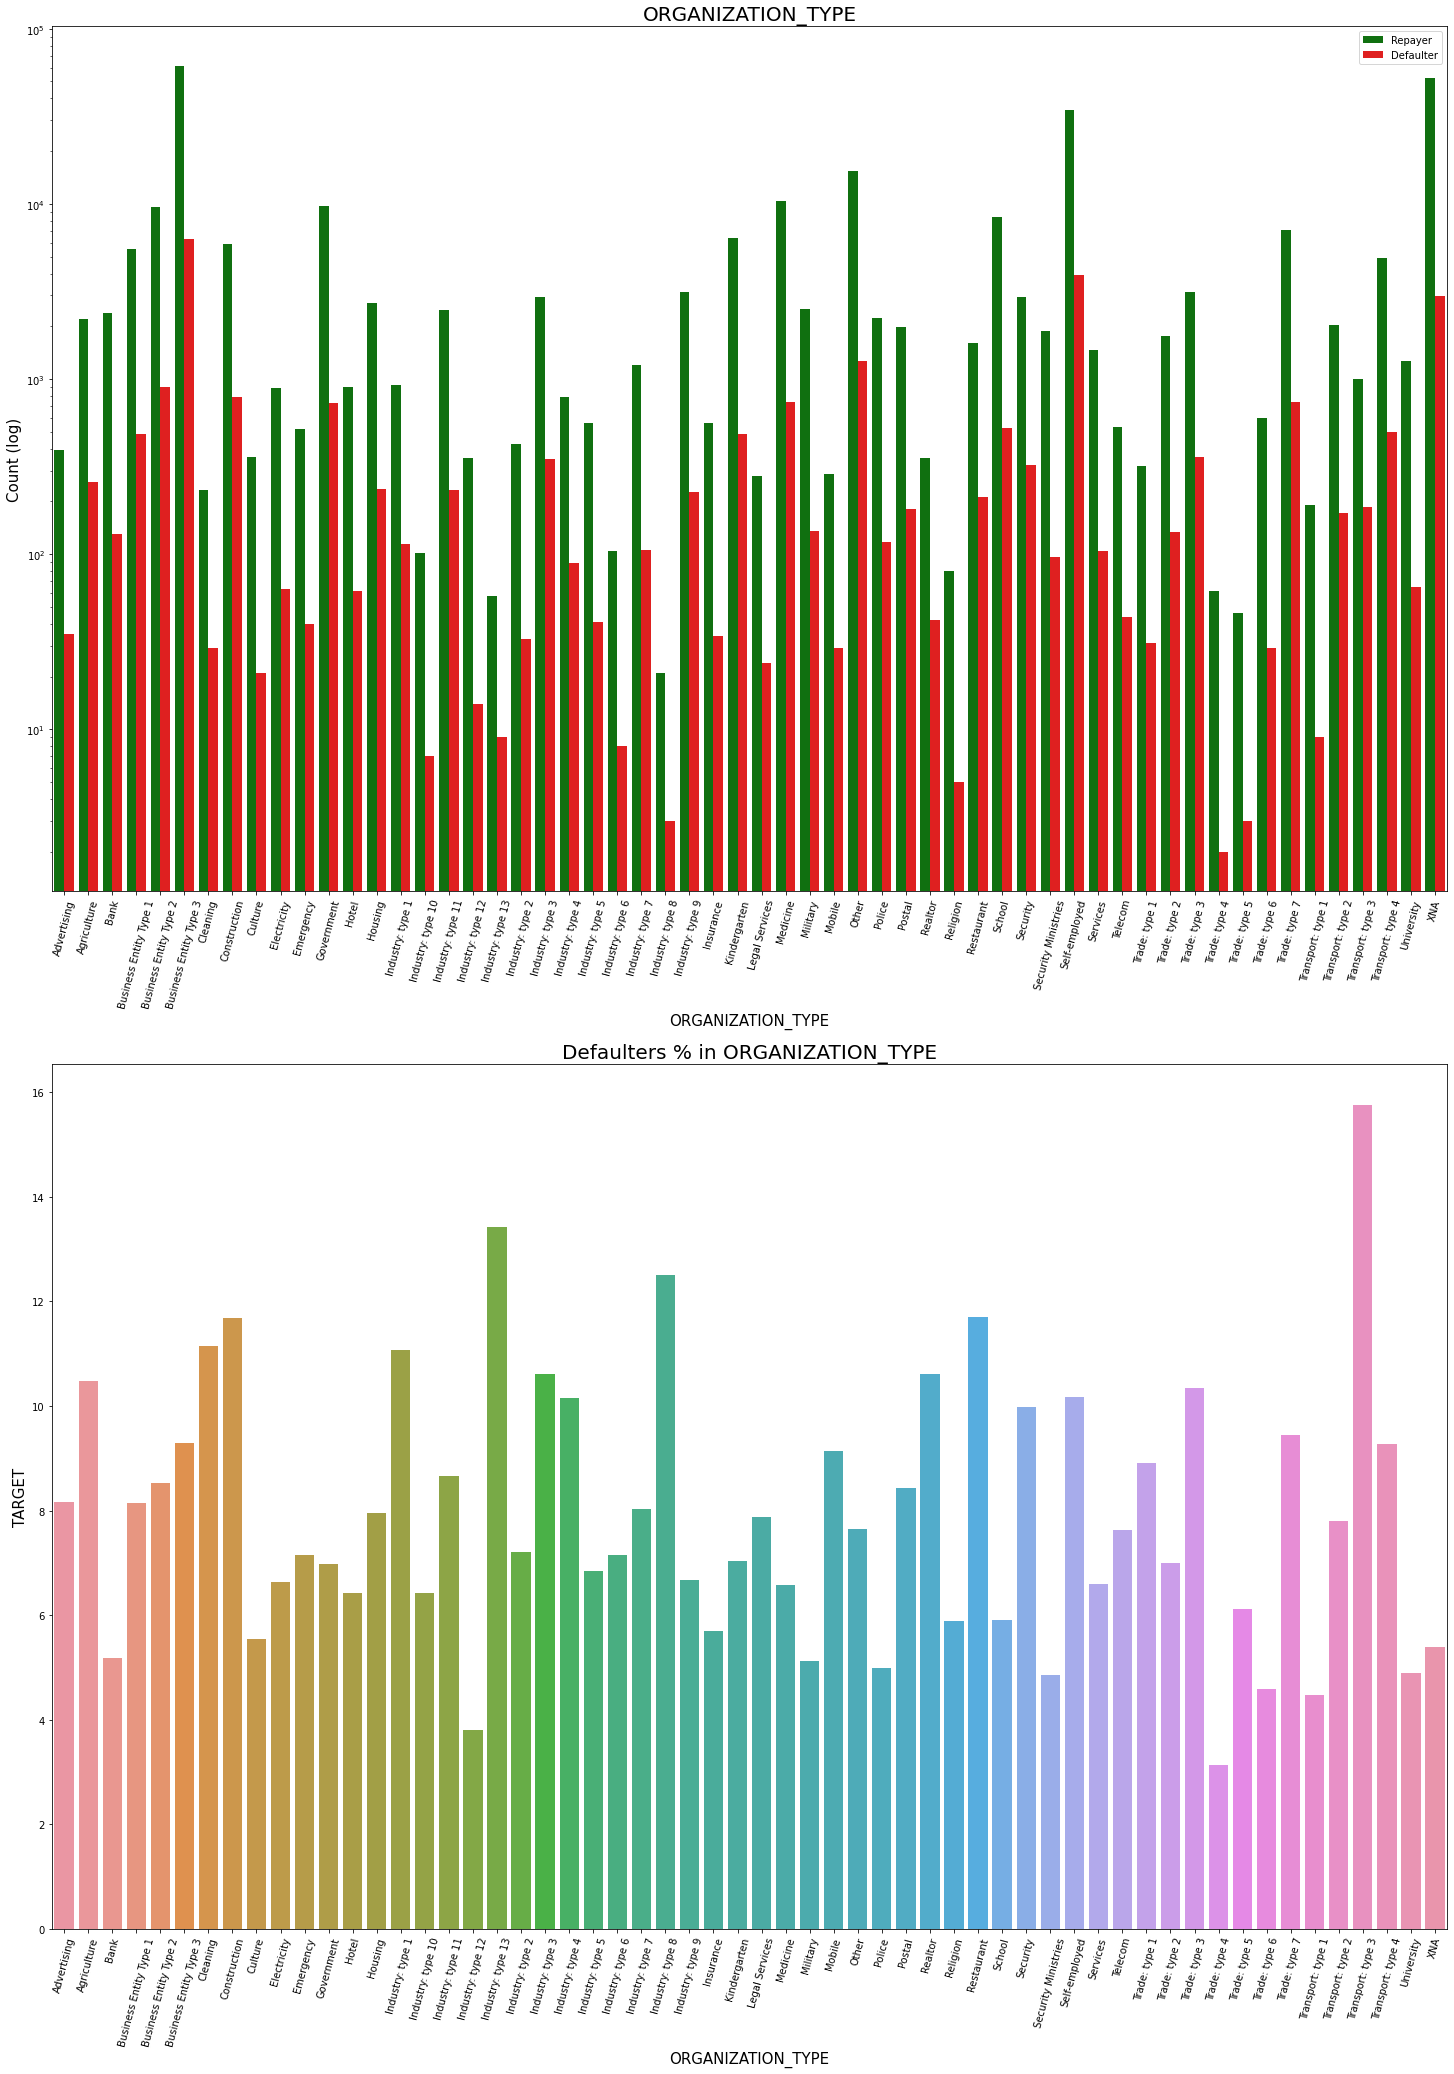

In [112]:
#Checking Loan repayment status based on Organization type
univariate(ap_dt,"ORGANIZATION_TYPE","TARGET",True,True,False)

## 13.0 Categorical Bivariate or Multivariate Analysis

In [113]:
ap_dt.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71617.0,2.029553,1.479742,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55362.0,1.364013,0.766503,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21703.0,1.797380,1.008806,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158774.0,1.631699,3.075777,0.2565,1.125,1.3500,2.02500,1170.0000


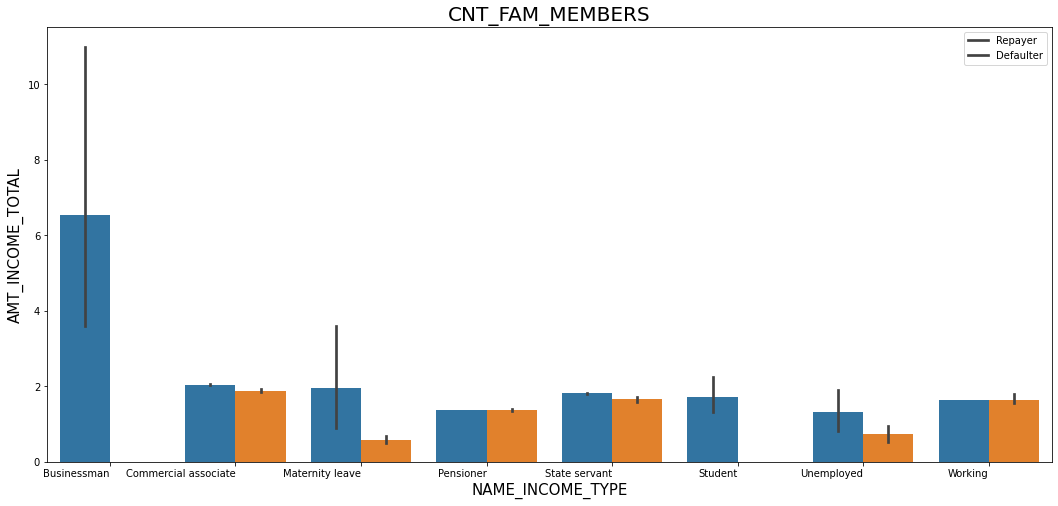

It can be seen that Businessman income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a Businessman could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs


In [114]:
# Income type vs Income Amount Range on a Seaborn Barplot
bivariate_c("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",ap_dt,"TARGET",(18,8),['Repayer','Defaulter'])
print("It can be seen that Businessman income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a Businessman could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs")

### 13.1 Numeric Variables Analysis

#### Bisecting the ap_dt file [Target value 0 and 1 for correlation and other analysis]

In [115]:
#columnns of dataframe "ap_dt"
ap_dt.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU

In [116]:
ap_dt.shape

(307511, 53)

In [117]:
# bisecting the ap_da dataframe based on Target value 0 and 1 for correlation and other analysis
#Variable="col_corr" 
col_corr = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [118]:
# Repayers dataframe = rp_df
Rp_df = ap_dt.loc[ap_dt['TARGET']==0, col_corr]

In [119]:
# Defaulters dataframe = Dfaul_df
Dfaul_df = ap_dt.loc[ap_dt['TARGET']==1, col_corr]

In [120]:
len(col_corr)

41

In [121]:
# Getting  top 10 correlation for the Repayers dataframe
corr_rp = Rp_df.corr()
corr_df_rp = corr_rp.where(np.triu(np.ones(corr_rp.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_rp.columns =['VAR1','VAR2','Correlation']
corr_df_rp.dropna(subset = ["Correlation"], inplace = True)
corr_df_rp["Correlation"]=corr_df_rp["Correlation"].abs() 
corr_df_rp.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_rp.head()

,VAR1,VAR2,Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
43,AMT_ANNUITY,AMT_CREDIT,0.771309
131,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
42,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953


In [122]:
# Getting the top 10 correlation for the Defaulter data
corr_Dfaul = Dfaul_df.corr()
corr_Dfaul = corr_Dfaul.where(np.triu(np.ones(corr_Dfaul.shape),k=1).astype(np.bool))
corr_df_Dfaul = corr_Dfaul.unstack().reset_index()
corr_df_Dfaul.columns =['VAR1','VAR2','Correlation']
corr_df_Dfaul.dropna(subset = ["Correlation"], inplace = True)
corr_df_Dfaul["Correlation"]=corr_df_Dfaul["Correlation"].abs()
corr_df_Dfaul.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Dfaul.head()

,VAR1,VAR2,Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
43,AMT_ANNUITY,AMT_CREDIT,0.752195
131,DAYS_EMPLOYED,DAYS_BIRTH,0.582185
152,DAYS_REGISTRATION,DAYS_BIRTH,0.289114


### 13.2 Numerical Univariate Analysis

<Figure size 1080x1080 with 0 Axes>

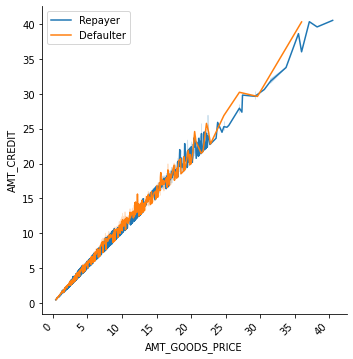

When the credit amount goes beyond 30 Lakhs, there is an increase in defaulters.


In [123]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_n('AMT_GOODS_PRICE','AMT_CREDIT',ap_dt,"TARGET", "line",['Repayer','Defaulter'])
print("When the credit amount goes beyond 30 Lakhs, there is an increase in defaulters.")

## 14.0 Report on Dataframes (1 & 2) Analysis 

- Data Frame 1 = "Application Data" 
- Data Frame 2 = "Previous Application Data"

In [124]:
# merge both the dataframe on SK_ID_CURR with Inner Joins
loan = pd.merge(ap_dt, pr_ap_dt, how='inner', on='SK_ID_CURR')
loan.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,YEARLY_DECISION
0,100002,1,Cash loans,M,Y,0,2.025,4.065975,24700.5,3.510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,2L-3L,4L-5L,3L-4L,25.920548,25-30,1.745205,0-5,1038818,Consumer loans,9251.775,179055.00,179055.0,179055.00,XAP,Approved,606,XNA,XAP,Unknown,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0,2
1,100003,0,Cash loans,F,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,10L Above,10L Above,45.931507,45-50,3.254795,0-5,1810518,Cash loans,98356.995,900000.00,1035882.0,900000.00,XNA,Approved,746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0,3
2,100003,0,Cash loans,F,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,10L Above,10L Above,45.931507,45-50,3.254795,0-5,2636178,Consumer loans,64567.665,337500.00,348637.5,337500.00,XAP,Approved,828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0,3
3,100003,0,Cash loans,F,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,10L Above,10L Above,45.931507,45-50,3.254795,0-5,2396755,Consumer loans,6737.310,68809.50,68053.5,68809.50,XAP,Approved,2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0,7
4,100004,0,Revolving loans,M,Y,0,0.675,1.350000,6750.0,1.350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0

In [125]:
#Checking the details of the merged dataframe
loan.shape

(1413701, 82)

In [126]:
# checking the columns and column types of the dataframe
loan.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE_x           category
CODE_GENDER                    category
FLAG_OWN_REALTY                category
CNT_CHILDREN                   category
AMT_INCOME_TOTAL                float64
AMT_CREDIT_x                    float64
AMT_ANNUITY_x                   float64
AMT_GOODS_PRICE_x               float64
NAME_TYPE_SUITE_x              category
NAME_INCOME_TYPE               category
NAME_EDUCATION_TYPE            category
NAME_FAMILY_STATUS             category
NAME_HOUSING_TYPE              category
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
OCCUPATION_TYPE                category
CNT_FAM_MEMBERS                category
REGION_RATING_CLIENT           category
REGION_RATING_CLIENT_W_CITY    category


In [127]:
# Bisecting the "loan" dataframe based on Target value 0 and 1 for correlation and other analysis
rpr = loan[loan['TARGET']==0] # Repayers
dfl = loan[loan['TARGET']==1] # Defaulters

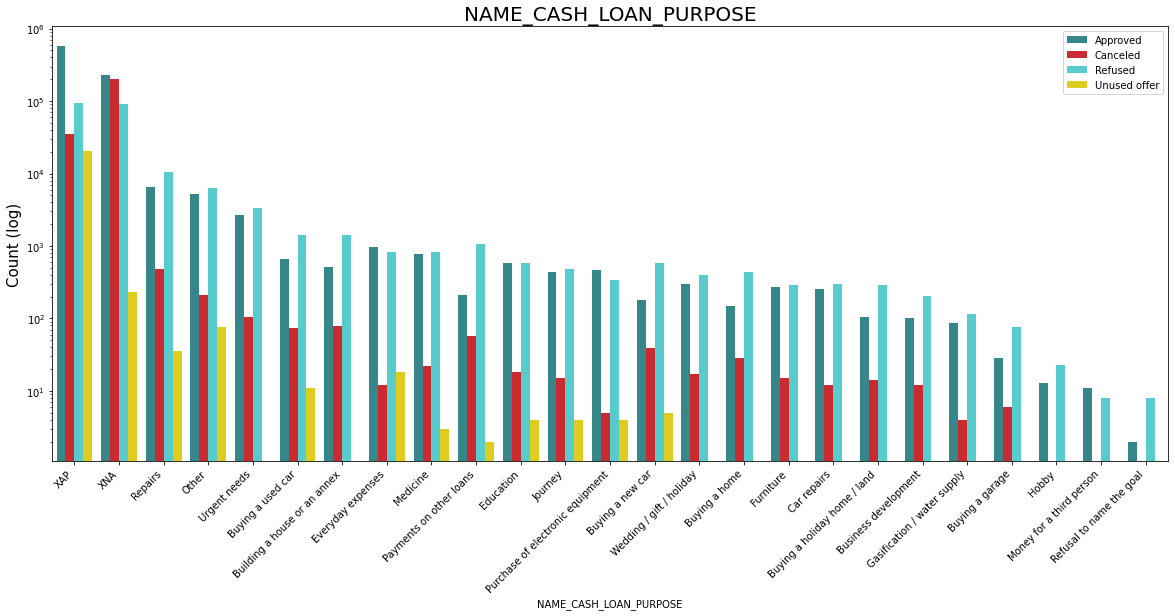

In [128]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",rpr,"NAME_CONTRACT_STATUS",["#299398","#e41017","#45dfdf","#ffe600"],True,(20,8))

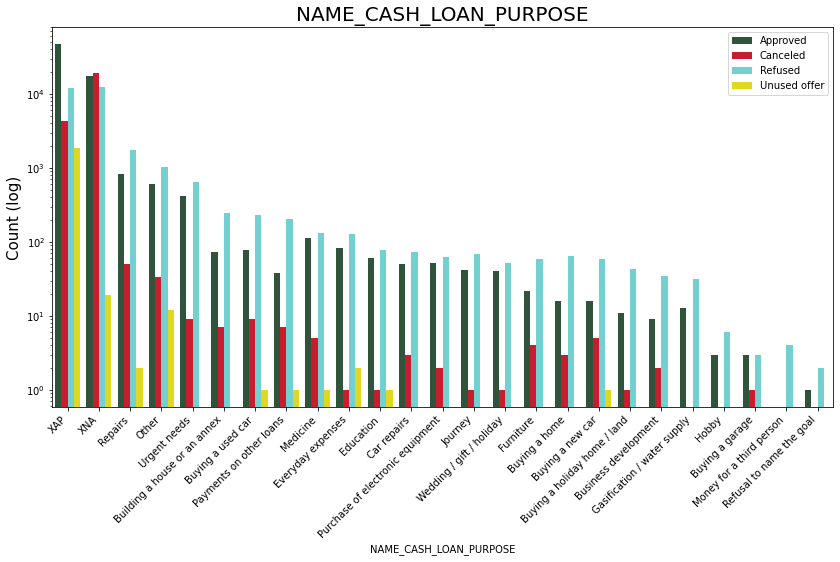

Loan purpose has high number of unknown values (XAP, XNA) Loan taken for the purpose of Repairs looks to have highest default rate Huge number application have been rejected by bank or refused by client which are applied for Repair or Other. from this we can infer that repair is considered high risk by bank. Also, either they are rejected or bank offers loan on high interest rate which is not feasible by the clients and they refuse the loan.


In [129]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",dfl,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(14,7))
print("Loan purpose has high number of unknown values (XAP, XNA) Loan taken for the purpose of Repairs looks to have highest default rate Huge number application have been rejected by bank or refused by client which are applied for Repair or Other. from this we can infer that repair is considered high risk by bank. Also, either they are rejected or bank offers loan on high interest rate which is not feasible by the clients and they refuse the loan.")

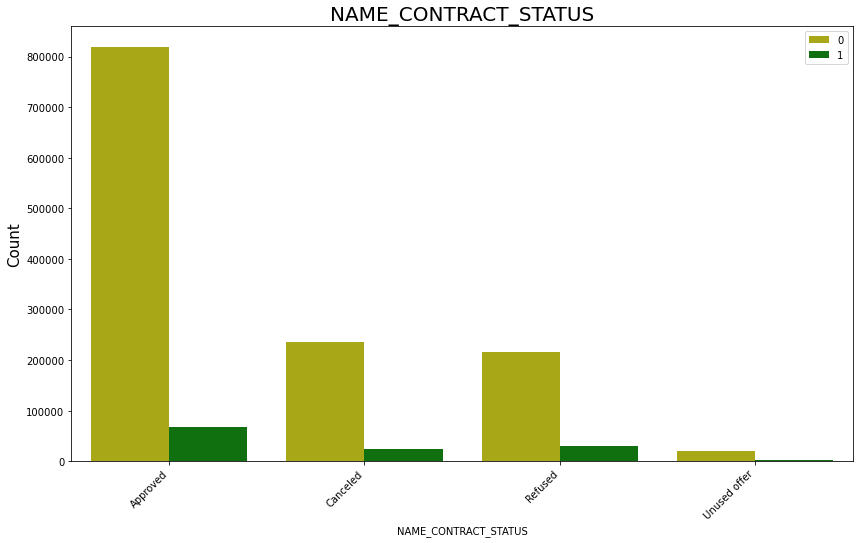

90% of the previously cancelled client have actually repayed the loan. Revising the interest rates would increase business opportunity for these clients88% of the clients who have been previously refused a loan has payed back the loan in current case.Refusal reason should be recorded for further analysis as these clients could turn into potential repaying customer.


Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%

In [130]:
# Checking Contract Status based on loan repayment status whether there is any business loss or financial loss

univariate_c_merged("NAME_CONTRACT_STATUS",loan,"TARGET",['y','g'],False,(14,8))
r = loan.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([r.value_counts(),round(r.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print("90% of the previously cancelled client have actually repayed the loan. Revising the interest rates would increase business opportunity for these clients88% of the clients who have been previously refused a loan has payed back the loan in current case.Refusal reason should be recorded for further analysis as these clients could turn into potential repaying customer.")
df1

Clients who have average of 0.13 or higher their DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and thus analysing client's social circle could help in disbursment of the loan.


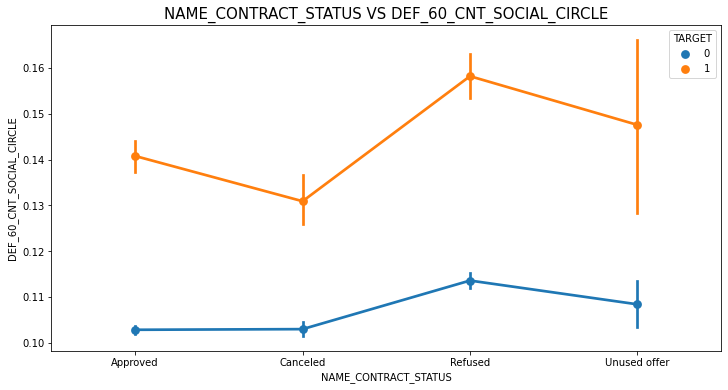

In [131]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status
pointplot(loan,"TARGET","NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')
print("Clients who have average of 0.13 or higher their DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and thus analysing client's social circle could help in disbursment of the loan.")

-----
## ----------------------------------------------------- End Of Analysis --------------------------------------------------------

 #      ---- --     Conclusion are written in Attached PowerPoint Presentation slides.-- ----
